## Data Preprocessing
### Data collection
The members of the ERBB gene family were extracted from the Ensembl database by using human EGFR, ERBB2, ERBB3 and ERBB4 as queries respectively. Full-length protein sequences of the ERBB gene family originating from representative species were filtered from the sequences obtained with the BioMart of the Ensembl Database (GRCh37 v75). The multiple alignments of 60 ERBB amino acid sequences from 17 species including Homo sapiens were obtained by the ClustalW program set with the default parameters, followed by manual adjustment to filter out sequences with a high amount of blanks in the alignment. Consequently, a reliable phylogenetic tree was inferred by the neighbor-joining method using MEGA7 with Poisson distance. Bootstrap analysis was carried out to assess support for individual nodes with 1000 replicates. The bootstrap values shown on the branches indicate the percentages that each branch occurred out of 1000.
### Subtree file generation
Then, software such as MEGA7 can be used to manually divide gene families that need to undergo DIVERGE functional divergence calculation into separate subtree files, or the tree partitioning function `diverge.utils.get_genefam_clusters` provided by DIVERGE can be used to generate subtree files. 
<br>
**Note:** If you need to use the built-in subtree file generation function of DIVERGE software, please modify the naming format of external nodes in the phylogenetic tree in advance to `"species"+"_"+"gene family"` form, and then use `diverge.utils.get_genefam_clusters(tree_obj,gene_fam,exclude_list=[],exclude_level=1)` function for subtree file generation.This function will return **a list containing all the partitioned subtrees**.
<br>
Here, tree_obj is the phylogenetic tree object and the gene_fam attribute is the gene family members name that needs to be separated, which can be a dictionary or a list.
<br>
*Example of External Node Naming Rule:*
```
((((((((Amazon_molly_ERBB3b,Medaka_ERBB3b),Fugu_ERBB3b),zebrafish_ERBB3b),(zebrafish_ERBB3a,(Fugu_ERBB3a,(Amazon_molly_ERBB3a,Medaka_ERBB3a)))),(Xenopus_ERBB3,((Anole_lizard_ERBB3,chicken_ERBB3),(Tasmanian_devil_ERBB3,(mouse_ERBB3,(Panda_ERBB3,(human_ERBB3,Marmoset_ERBB3))))))),((((Amazon_molly_ERBB4a,Fugu_ERBB4a),(zebrafish_ERBB4,zebrafish_ERBB4a)),(Medaka_ERBB4b,(Amazon_molly_ERBB4b,Fugu_ERBB4b))),(Anole_lizard_ERBB4,((chicken_ERBB4,Zebra_Finch_ERBB4),((Chimpanzee_ERBB4,human_ERBB4),(mouse_ERBB4,Panda_ERBB4)))))),(((((((((Chimpanzee_EGFR,human_EGFR),Marmoset_EGFR),mouse_EGFR),Tasmanian_devil_EGFR),(Chinese_softshell_turtle_EGFR,(chicken_EGFR,Zebra_Finch_EGFR))),Anole_lizard_EGFR),Xenopus_EGFR),(zebrafish_EGFRa,(Fugu_EGFRa,(Amazon_molly_EGFRa,Medaka_EGFRa)))),((((Amazon_molly_ERBB2,Medaka_ERBB2),Fugu_ERBB2),zebrafish_ERBB2),(Xenopus_ERBB2,(((chicken_ERBB2,Chinese_softshell_turtle_ERBB2),Anole_lizard_ERBB2),(Tasmanian_devil_ERBB2,(mouse_ERBB2,(Panda_ERBB2,(Marmoset_ERBB2,(Chimpanzee_ERBB2,human_ERBB2)))))))))),Fruitfly_EGFR,Caenorhabditis_elegans_let-23);
```
When constructing the phylogenetic tree of gene families, several external nodes are often selected. The purpose of these external nodes is to make the constructed phylogenetic tree more accurate. However, when we perform subtree partitioning, we cannot include them in the resulting subtrees. `diverge.utils.get_genefam_clusters` can automatically filter out these external nodes when partitioning subtrees. 
<br>
Of course, you can also manually set parameters to achieve a more ideal filtering effect: use the exclude_list parameter to set the gene families that need to be filtered and use `exclude_level` to set the filtering level. Here, the filtering level refers to how many generations have passed from the root node to the external node of an outgroup.

In [4]:
from diverge.utils import get_genefam_clusters
from Bio import Phylo

`tree_obj`can be load by `Bio.Phylo`

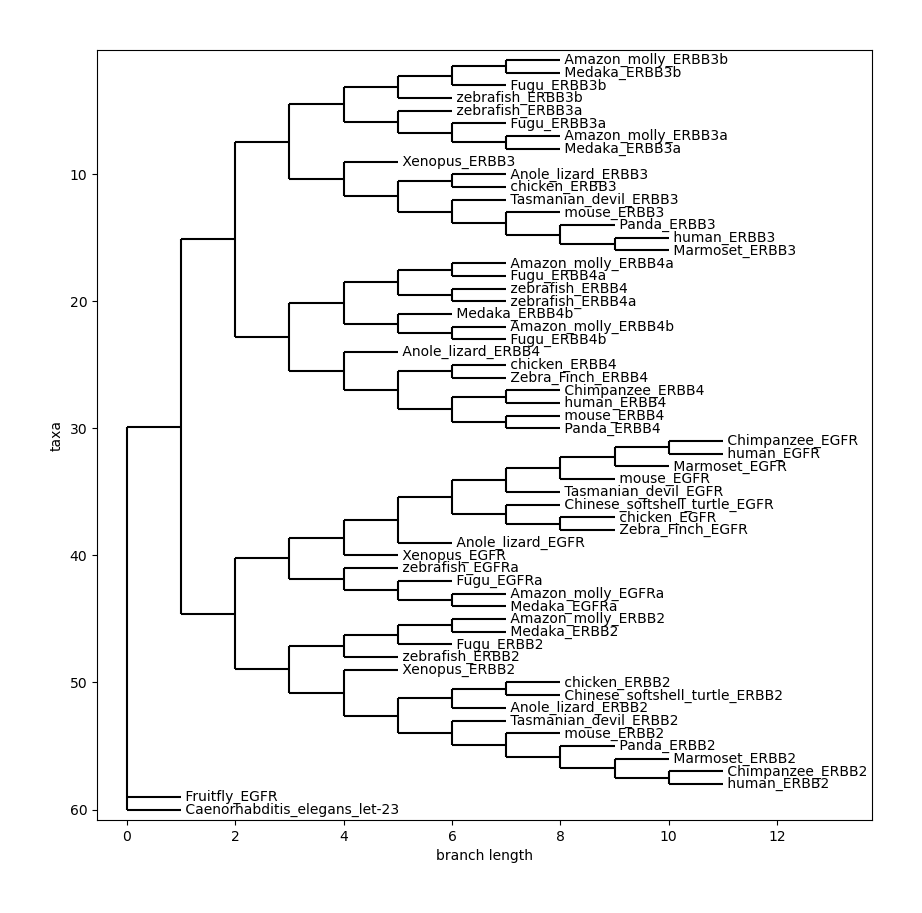

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=10)
matplotlib.rc('figure', figsize=(10, 10))
fam_tree = Phylo.read("./ERBB_family.nwk",'newick')
Phylo.draw(fam_tree)

In [5]:
tree_list,gene_fam = get_genefam_clusters(fam_tree,['EGFR','ERBB2','ERBB3','ERBB4'])

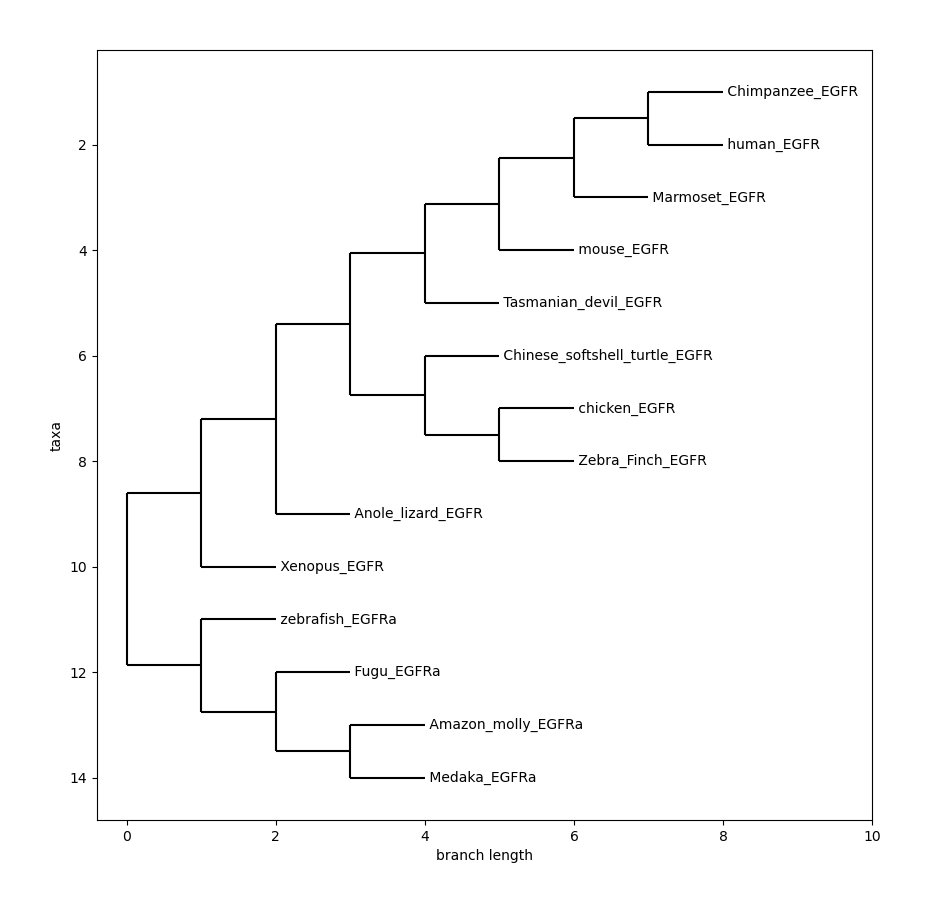

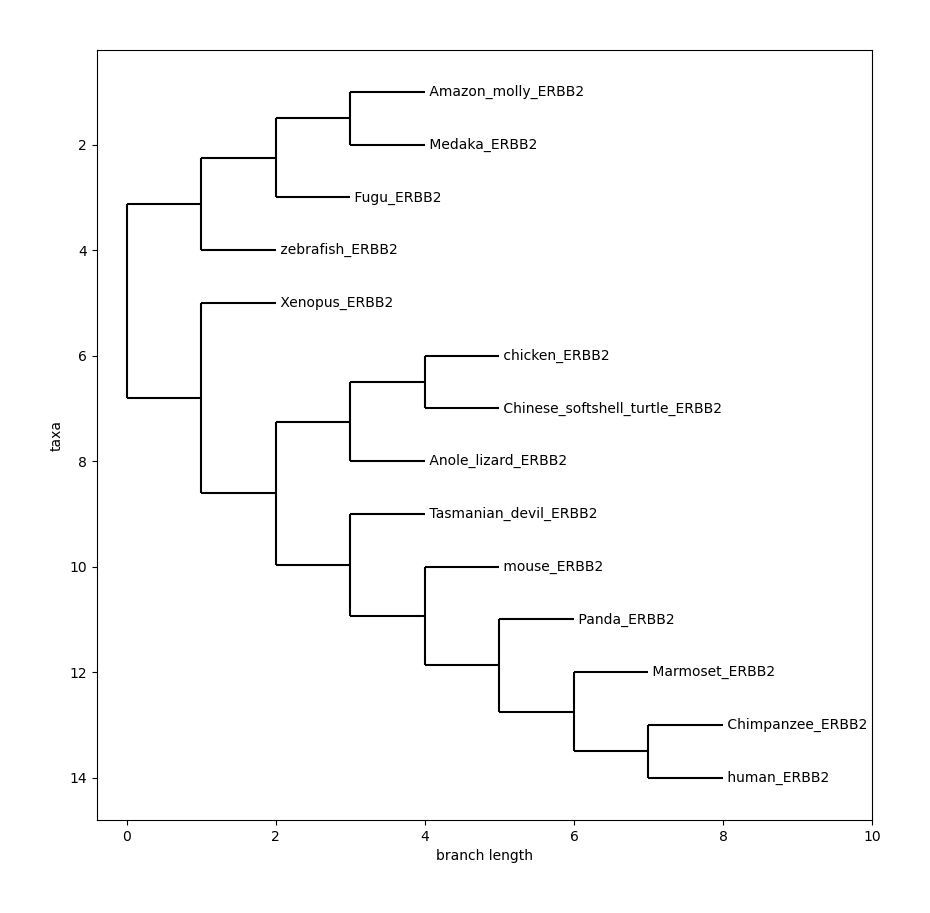

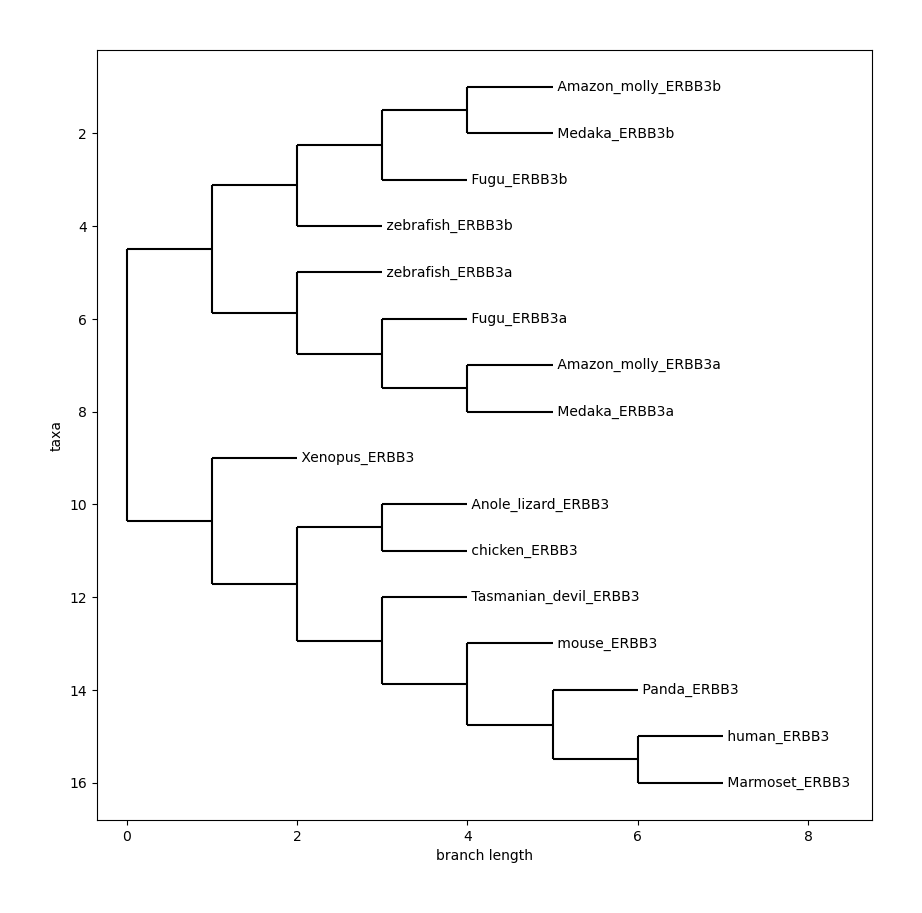

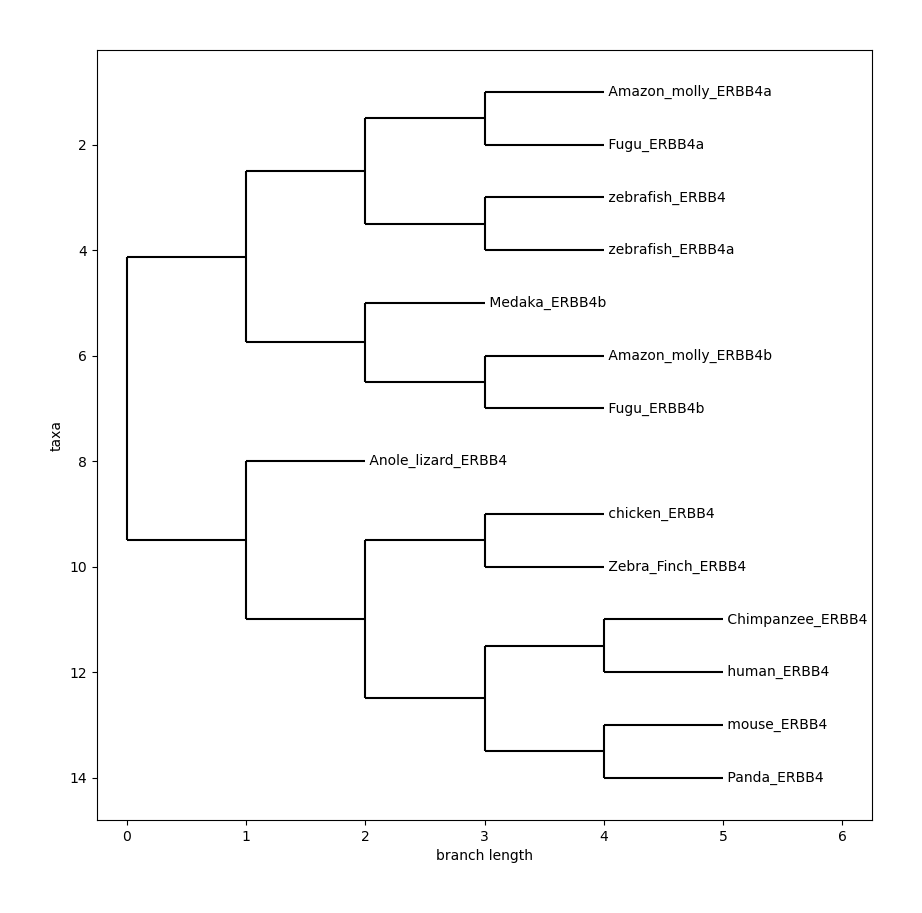

In [4]:
for tree in tree_list:
    Phylo.draw(tree)

In [5]:
# write subtree into newick format tree files
for tree,gene_name in zip(tree_list,gene_fam):
    Phylo.write(tree,f"./{gene_name}.tree",'newick')

You can also pass the gene_fam attribute in the form of a dictionary, where the key can be customized to any name you want and the value is one or more names of gene family members with a common ancestor.
<br>
We can explore the evolutionary patterns by constructing an neighbor-joining tree. The result shows that ERBB3 is evolutionarily closer to ERBB4 while EGFR appears more closely related to ERBB2. Just as Stein RA said, the gene duplication of EGFR/ERBB2 progenitor and ERBB3/ERBB4 progenitor led to the set of four individual ERBB receptors. Therefore, we merge ERBB2 and EGFR into one cluster, and ERBB3 and ERBB4 into another cluster. Then we input these parameters in dictionary form to perform functional differentiation analysis on these two clusters.

dict_keys(['EGFR_ERBB2', 'ERBB3_ERBB4'])


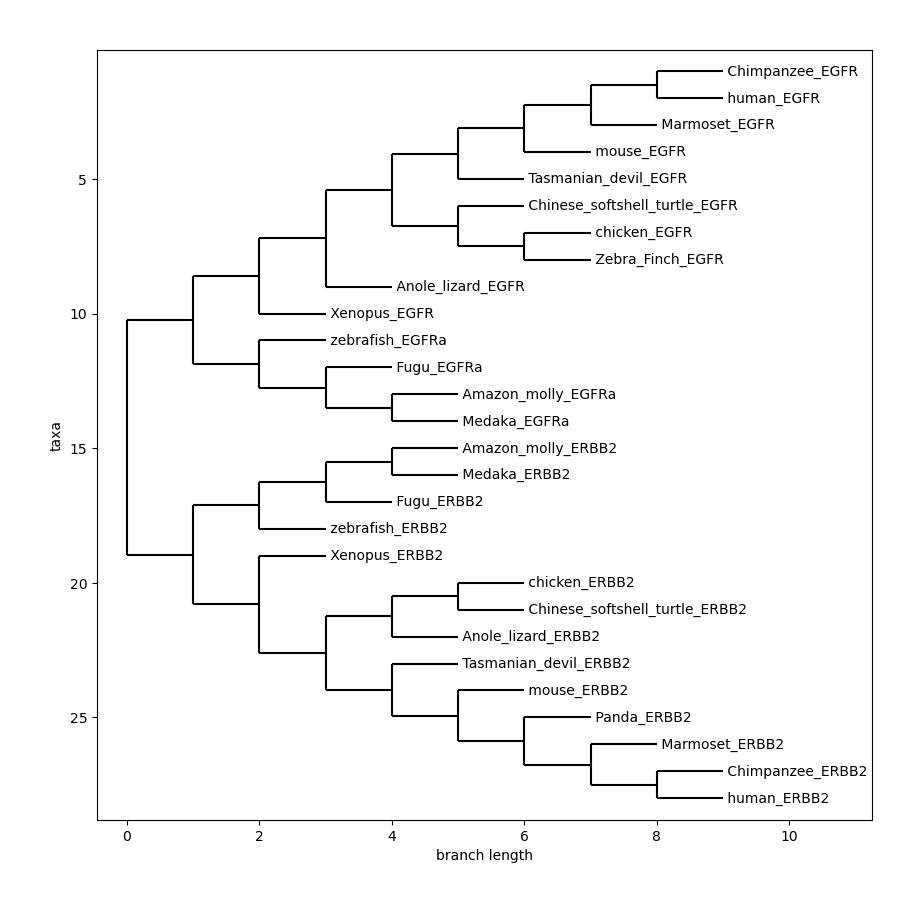

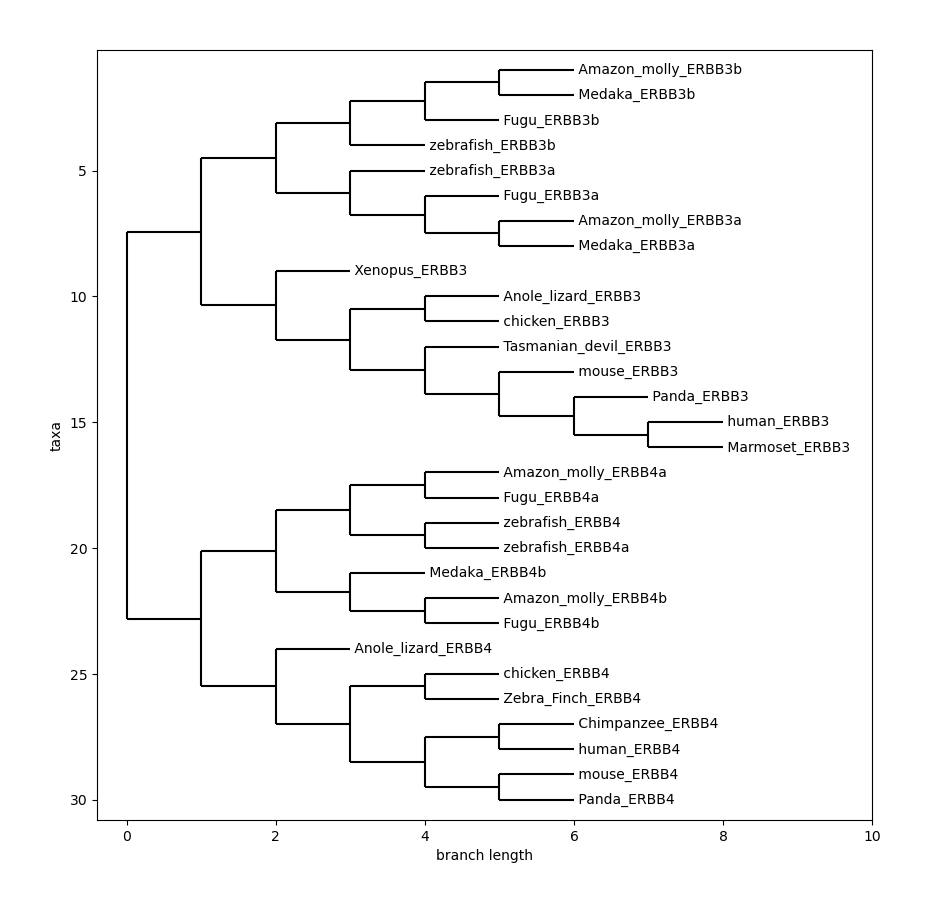

In [6]:
tree_list,cluster_name = get_genefam_clusters(fam_tree,{'EGFR_ERBB2':['EGFR','ERBB2'],'ERBB3_ERBB4':['ERBB3','ERBB4']})
print(cluster_name)
for tree in tree_list:
    Phylo.draw(tree)
# write subtree into newick format tree files
for tree,cluster in zip(tree_list,cluster_name):
    Phylo.write(tree,f"./{cluster}.tree",'newick')

## Diverge calculation
Use fully automatic pipeline to calculate functional divergence between EGFR,ERBB2,ERBB3 and ERBB4 gene family.

In [2]:
from diverge import CalPipe

In [3]:
pipeline = CalPipe("./ERBB_family.fas","./EGFR.tree","./ERBB2.tree","./ERBB3.tree","./ERBB4.tree")
pipeline.result_summary.keys()

Fdr calculation running...: 100%|████████████████████████████████████████████████████████| 4/4 [00:33<00:00,  8.36s/it]


dict_keys(['gu99_summary', 'gu99_results', 'type2_summary', 'type2_results', 'type1_fdr', 'type2_fdr', 'fundist_results'])

### Type I and Type II functional divergence analysis
Type I functional divergence analysis was performed using `diverge.Gu99` and `diverge.Gu2001` to estimate the potential functional divergence and predict the patterns of sequence variations across the ERBB family, underlying the gene family’s evolution. The co-efficient of evolutionary functional divergence (θ) between two clusters and the standard error of each pairwise comparison were calculated by the model-free method. The co-efficient θ refers to the probabilities of functional divergence that occurred in the pairs of clusters; θ significantly greater than zero (p < 0.05) implies that altered functional constraint between them is statistically significant. 
<br>
The posterior probability (Qk) of type I functional divergence for each amino acid site (k) could also be computed by Gu’s method, which assesses the probability of critical amino acid residues to be responsible for the functional divergence. The predicted residues are meaningful only when Qk >0.5, a more stringent cut off may be Qk >0.67. Additionally, type II functional divergence can be analyzed as the same by `diverge.Type2`. However, the result of type II functional divergence analysis in our study was null.

In [19]:
print("###Type I Functional Divergence Analysis Results###")
display(pipeline.gu99_summary)
print("###Type II Functional Divergence Analysis Results###")
display(pipeline.type2_summary)

###Type I Functional Divergence Analysis Results###


,EGFR/ERBB2,EGFR/ERBB3,EGFR/ERBB4,ERBB2/ERBB3,ERBB2/ERBB4,ERBB3/ERBB4
MFE Theta,0.156189,0.375439,0.247029,0.341112,0.305535,0.439012
MFE se,0.032617,0.040166,0.038208,0.040850,0.042188,0.045574
MFE r X,0.596970,0.446392,0.517398,0.457328,0.463417,0.378189
MFE r max,0.707468,0.714729,0.687142,0.694091,0.667301,0.674149
MFE z score,-5.401999,-11.620071,-7.523768,-10.093773,-8.485148,-11.725090
ThetaML,0.124000,0.376000,0.240000,0.329600,0.185600,0.322400
AlphaML,0.629726,0.584284,0.412429,0.750700,0.644737,0.570352
SE Theta,0.030232,0.027798,0.035466,0.029389,0.038344,0.038259
LRT Theta,16.823128,182.962184,45.793288,125.778607,23.429350,71.011352


###Type II Functional Divergence Analysis Results###


,EGFR/ERBB2,EGFR/ERBB3,EGFR/ERBB4,ERBB2/ERBB3,ERBB2/ERBB4,ERBB3/ERBB4
Parameters,,,,,,
Da,1.760163,1.760163,1.760163,2.122731,2.122731,2.495434
Db,2.122731,2.495434,0.630909,2.495434,0.630909,0.630909
N,526.000000,433.000000,509.000000,426.000000,471.000000,495.000000
C,108.000000,146.000000,129.000000,136.000000,131.000000,121.000000
R,147.000000,202.000000,143.000000,219.000000,179.000000,165.000000
Alpha ML,0.629726,0.584284,0.412429,0.750700,0.644737,0.570352
Theta-II,-0.021966,0.100514,0.085860,0.064261,0.068470,0.026950
Theta SE,0.058211,0.055987,0.040428,0.066753,0.051276,0.051044
Ar,-3.508365,1.609353,1.260478,2.589733,1.952550,4.016074


You can also do independent computing process to setup your custom pipeline. For example, use `diverge.Gu99` to perform a type I functional divergence calculation.

In [15]:
from diverge import Gu99,Type2
gu99 = Gu99("./ERBB_family.fas","EGFR_ERBB2.tree","ERBB3_ERBB4.tree")
type2 = Type2("./ERBB_family.fas","EGFR_ERBB2.tree","ERBB3_ERBB4.tree")

In [21]:
print("###Type I Functional Divergence Analysis Results###")
display(gu99.summary())
print("###Type II Functional Divergence Analysis Results###")
display(type2.summary())

###Type I Functional Divergence Analysis Results###


,EGFR_ERBB2/ERBB3_ERBB4
MFE Theta,0.246213
MFE se,0.029317
MFE r X,0.595220
MFE r max,0.789640
MFE z score,-10.732048
ThetaML,0.293600
AlphaML,0.717033
SE Theta,0.023312
LRT Theta,158.614938


###Type II Functional Divergence Analysis Results###


,EGFR_ERBB2/ERBB3_ERBB4
Parameters,
Da,4.000331
Db,3.446235
N,462.000000
C,129.000000
R,190.000000
Alpha ML,0.717033
Theta-II,-0.001287
Theta SE,0.079445
Ar,-89.523993


The insight into the functional divergence of the ERBB gene family was obtained from the consequence of a type I functional divergence analysis while the result of type II functional analysis was null. Type I functional divergence analysis was successfully carried out in four clusters, including EGFR-ERBB2, ERBB2-ERBB3, ERBB3-ERBB4, EGFR/ERBB2-ERBB3/ERBB4. All the co-efficients (Table 1) of functional divergence of the four clusters are significantly greater than zero (p < 0.01) which reveals that functional divergence did occur between pairwise clusters.
<br>
The site-specific profile(s) can get by calling `pipeline.gu99_results` or `gu99.results()`, which is the posterior probability (Qk) of a site to be functional divergence-related. Moreover, you can give a cut-off value and view the relate site on the alignment view use `view_cutoff_msa` function. The alignment viewer options require the user select which pairwise comparisons to examine.
<br>
Usually, in statistics, the inferred residues are meaningful only when Qk >0.5 and a more empirical and rigorous cut off is Qk >0.67. Of course, you can also obtain more accurate statistical results through the false discovery rate (FDR) analysis (`diverge.Fdr()`).

In [22]:
display(gu99.results())

,EGFR_ERBB2/ERBB3_ERBB4
133,0.214167
134,0.347363
135,0.148561
136,0.148561
137,0.148561
...,...
1437,0.954774
1450,0.340375
1451,0.975698
1460,0.139114


In [11]:
from diverge import Fdr
fdr = Fdr("./ERBB_family.fas","EGFR_ERBB2.tree","ERBB3_ERBB4.tree")
data_df = fdr.type1_results()
display(data_df)

,FDR of EGFR_ERBB2/ERBB3_ERBB4
Probability Cutoff,
0.00,0.706398
0.02,0.706398
0.04,0.705405
0.06,0.703172
0.08,0.697770
0.10,0.692873
0.12,0.687420
0.14,0.680045
0.16,0.627836


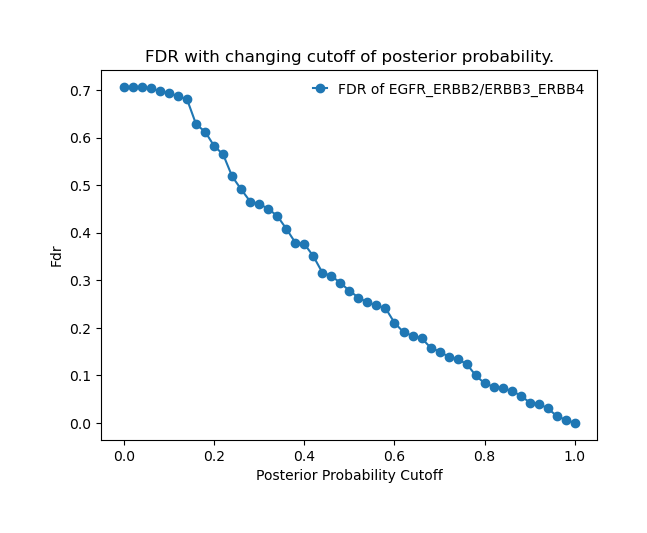

In [21]:
ax = data_df.plot(marker="o")
ax.set_xlabel("Posterior Probability Cutoff")
ax.set_ylabel("Fdr")
ax.set_title("FDR with changing cutoff of posterior probability.")
plt.show()

Then we collect functional amino acid domains of human ERBB gene family from UniprotKB database (https://www.uniprot.org/). 
<div style="text-align:center;">
  <img src="./static/ERBB_domain_uniport.jpg" alt="ERBB_domain_uniportn" width="600" />
</div>
And, the Type I related effective sites of four gene clusters which located in the domains of human ERBB gene family were further analyzed according to the domains. According to the results (Table 1), based on the cut-off Qk >0.5, 12 type I related effective sites (12/34, 35.29%) in domains were identified between the EGFR-ERBB2 cluster, and 46 (46/46, 100%), 56 (56/56, 100%), 83 (83/83, 100%) effective sites in domains were also found respectively in the ERBB3-ERBB4, ERBB2-ERBB3, EGFR/ERBB2-ERBB3/ERBB4 clusters
<table style="text-align: center;">
    <caption style="white-space: nowrap;"><strong>Table 1.</strong>Functional divergence of ERBB gene family and the number of effective sites in each gene cluster</caption>
  <thead>
    <tr>
      <th>          </th>
      <th>EGFR-ERBB2</th>
      <th>ERBB2-ERBB3</th>
      <th>ERBB3-ERBB4</th>
      <th>EGFR/ERBB2-ERBB3/ERBB4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>&theta;<sub>AB</sub> &plusmn; SE</td>
      <td>0.1562&plusmn;0.0326</td>
      <td>0.3411&plusmn;0.0409</td>
      <td>0.4390&plusmn;0.0456</td>
      <td>0.2462&plusmn;0.0293</td>
    </tr>
    <tr>
      <td>N<sub>E</sub></td>
      <td>41 (41/2088, 1.96%)</td>
      <td>70 (70/2088, 3.35%)</td>
      <td>60 (60/2088, 2.87%)</td>
      <td>105 (105/2088, 5.03%)</td>
    </tr>
    <tr>
      <td>N<sub>E</sub> in domains</td>
      <td>34 (34/41, 82.93%)</td>
      <td>56 (56/70, 80%)</td>
      <td>46 (46/60, 76.67%)</td>
      <td>83 (83/105, 79.05%)</td>
    </tr>
    <tr>
      <td>Qk >0.5</td>
      <td>12/34 (35.29%)</td>
      <td>56/56 (100%)</td>
      <td>46/46 (100%)</td>
      <td>83/83 (100%)</td>
    </tr>
    <tr>
      <td>Qk >0.67</td>
      <td>3/34 (8.82%)</td>
      <td>53/56 (94.62%)</td>
      <td>19/46 (41.30%)</td>
      <td>52/83 (62.65%)</td>
    </tr>
    <tr>
      <td>Qk >0.9</td>
      <td>0</td>
      <td>9/56 (16.07)</td>
      <td>5/46 (10.87%)</td>
      <td>12/83 (14.46)</td>
    </tr>
  </tbody>
    <tfoot>
    <tr>
      <td colspan="5" style="border-top: 1px solid #000; font-weight: bold;text-align: left !important;">
        NE: Number of effective sites; Qk: Posterior probability
      </td>
    </tr>
  </tfoot>
</table>

### Predicting cancer-related amino acid sites from type I functional divergence residues
Type I functional divergence residues are responsible for the emergence of multigene families and thus these residues, especially with high Qk, are considered to be important candidates for further assays to study their function, including the relationship with the progression and therapy of cancer. 
<br>
Among the predicted meaningful residue sites of the four clusters, five EGFR residues (L858, F856, T854, S442, Q408), nine ERBB2 residues (L866, F864, T862, Q624, G621, D618, F595, P594, K333), three ERBB3 residues (P328, K267, M120) and six ERBB4 residues (F862, T860, L864, H615, E613, D609) were found to be involved in drug binding sites. L858 of EGFR and L864 of ERBB4 are at the equivalent functional divergence site 1263 in EGFR/ERBB2-ERBB3/ERBB4 cluster, which both bind to lapatinib. Similarly, F856 of EGFR, F864 of ERBB2 and F862 of ERBB4 belong to functional divergence site 1261, T854 of EGFR, T862 of ERBB2 and T860 of ERBB4 are at site 1259 (Figure 4A). Interestingly, these functional divergence sites are all binding targets of lapatinib, except residues of ERBB3, which reveals that conserved residues may share common functions in a gene family, that functional divergence indeed contributed to the evolution of multigene families with multi functions and that analysis of these sites helps to discriminate the specificity of target drugs which could reduce the side effects as well. Furthermore, this type of analysis would be useful in drug design when considering the conserved residues as binding sites of drugs with broad spectrum or variable residues as binding sites of precise drugs with specificity. 
<br>
Residues related to functional divergence may possess important characteristics due to their critical roles in gene divergence. Highly recurrent mutations are hypothesized as driver mutations, and therefore, mutations of these residues may change the characteristics and disturb normal function. This can generate driver mutations in diseases such as cancer or influence drug efficiency. For example, EGFR L858R and ERBB4 L864R were reported to strongly enhance the activity of EGFR kinase and ERBB4 kinase respectively. Additionally, EGFR L858R appeared more sensitive to gefitinib than wild-type.
<br>
Functional residues such as Y275, R748, and L833 of EGFR; P780 of ERBB2; Y868 of ERBB3; and R927 of ERBB4 have Qk >0.67 except for ERBB4 R927 with Qk = 0.61.
<br>
Interestingly, we found a high occurrence (n=27) of EGFR L858R mutation in ICGC's database at site 1263 between the EGFR/ERBB2-ERBB3/ERBB4 cluster with a large posterior probability Qk = 0.88: 40% (or 4/10) in project lung squamous cell carcinoma-CN [LUSC-CN], 22/516 (or 4.26%) in project lung adenocarcinoma-US [LUAD-US], and 1/170 (or 0.59%) in project lung squamous cell carcinoma-KR [LUSC-KR]. Similarly, an occurrence rate was recorded for the ERBB4 L864P mutation at site SKCM-US [SKCM-US] with n=1 out of total samples size n=466 or 0.21%.
Furthermore, alterations like those seen with EGFR L858R or ERBBL864P/D813N play certain roles in cancer development by generating driver mutations.
EGFR L833V is another mutation that makes the gene more sensitive to gefitinib than wild-type and has one occurrence (1/516 or 0.19% in project LUAD-US in ICGC). The posterior probability of this site is also larger than 0.67. Finally, ERBB2 K333 with Qk = 0.71 was reported to have an alanine substitution that significantly reduces the binding affinity of pertuzumab to ERBB2, making it a resistant mutation in pertuzumab therapy.

## SuperCluster analysis
In the phylogenomics, the importance of gene function can be quantitatively measured based on the functional constraints of protein sequences. For example, if an amino acid residue is conserved evolutionarily, then it is important functionally. Evolutionary conservation of changes at a particular residue may indicate involvement in functional differentiation, so type I functional differentiation residues can represent important candidate residues generated from multi-gene families, especially when they have relatively high Qk values. However, when performing type I functional differentiation analysis on large-scale gene family data, especially if there are many genes in a gene family, calculating type I functional divergence for every combination manually is extremely tedious. Therefore, we developed the super cluster tool to simplify the process of functional differentiation analysis for large multi-gene families. Assuming there are m genes in gene family G, we only need to perform type I functional differentiation analysis on the $2^{m-1}-1$ gene grouping situations to obtain all potential type I functional differentiation sites, greatly reducing the computational cost.

在基因功能系统发育学中，基因功能的重要性可以根据蛋白质序列的功能约束来定量测量。例如，如果氨基酸残基在进化上是保守的，那么它在功能上就是重要的。某一特定残基上进化守恒的变化可能表明功能分化的参与,因此I 型功能分化残基可以代表多基因家族产生的重要候选残基，尤其是当它们具有较高的 Qk 值时。然而，当对大规模基因家族数据进行一型功能分化分析，特别是如果一个基因家族中有很多基因，那么手工计算每个组合的 I 型功能分歧是非常繁琐的。因此，我们开发了super cluster工具，来简化大规模多基因家族的功能分化分析流程。假设基因家族G中有m种基因，我们只需对$2^{m-1}-1$种基因分组情况进行一型功能分化分析即可得到所有潜在的一型功能分化位点，大大减少了计算成本。

In [3]:
from Bio import Phylo
import matplotlib.pyplot as plt
from diverge.utils import *
import pandas as pd

Collect sequences of interest in NCBI and run BLAST, you only need to provide the multiple sequence alignment result (usually in fasta or clustal format), DIVERGE can help you automatically complete the construction of the phylogenetic tree. You can modify the tree construction method (UPGMA or NJ) by adjusting the `tree_construct_method` parameter.
<br>
We will generate an $N*N$ distance matrix $D$ based on the constructed phylogenetic tree, where $N$ is the number of leaf nodes in the tree, and the element $D_{ij}$ in the matrix represents the distance between node $i$ and node $j$. Subsequently, we can perform hierarchical clustering on the distance matrix, and utilize the elbow method to automatically determine the optimal number of clusters by observing the second derivative of the merge distance, to achieve automatic subdivision of subtrees. Considering that several evolutionary outgroup species are usually introduced when constructing the phylogenetic tree to improve the accuracy, we will first automatically remove these external nodes when subdividing the subtrees. And you may try adjusting the 'exclude_level' parameter to achieve better results.
<br>
The following is a simple schematic of automatic subtree division. You can first use the default parameters for preliminary division, and set the plot parameter to true to observe the overall structure of the phylogenetic tree:

将感兴趣的序列在NCBI中进行BLAST后，只需提供多序列比对结果(通常为fasta或clustal格式文件)，DIVERGE可以帮助你自动完成进化树的构建，你可以通过调整`tree_construct_method`参数修改进化树构建方法(upgma或nj)。
<br>
我们会根据构建的进化树生成一个N*N的距离矩阵D,其中N是树中末端节点（叶节点）的数量，矩阵中的元素Dij 表示节点i和节点j之间的距离。随后我们可以对距离矩阵进行层次聚类，并利用elbow方法，通过观察合并距离的二阶导数来自动确定最佳聚类数目，实现子树的自动划分。考虑到在构建进化树时通常会引入几个外部节点来提高进化树的准确性，我们在子树划分时会先自动去除这些外部节点，你可以通过`exclude_level`参数进行调整。
<br>
下面是一个简单的子树自动划分示意,你可以先使用默认参数进行初步划分,将`plot`参数设为true来观察进化树的大致结构：

根据初步划分结果,调整合适的`exclude_level`尽量去除所有外部节点，你也可以根据聚类优化图设置合适的聚类数目`n_clusters`。
<br>
Based on the preliminary division result, adjust the appropriate `exclude_level` to remove all external nodes as much as possible. You can also set an appropriate number of clusters `n_clusters` according to the cluster optimization figure.

In [6]:
from diverge.utils import auto_split

In [1]:
from Bio import Phylo
phylo_tree = Phylo.read("./4.nwk",'newick')

In [ ]:
subtrees,subtree_clades,exclude_list= auto_split("./4.fas",plot=True,exclude_level=5,tree_construct_method='nj',dist_calc='blosum62',cluster_method='ward',root_at_midpoint=False)

Wed Jun 19 10:35:22 2024	 Running subtree auto split process
Wed Jun 19 10:35:22 2024	 Calculating distance matrix from msa using blosum62 method...
Wed Jun 19 10:35:52 2024	 Constructing phylogenetic tree using nj method...
Wed Jun 19 10:35:53 2024	 Phylogenetic tree of the alingnment file:


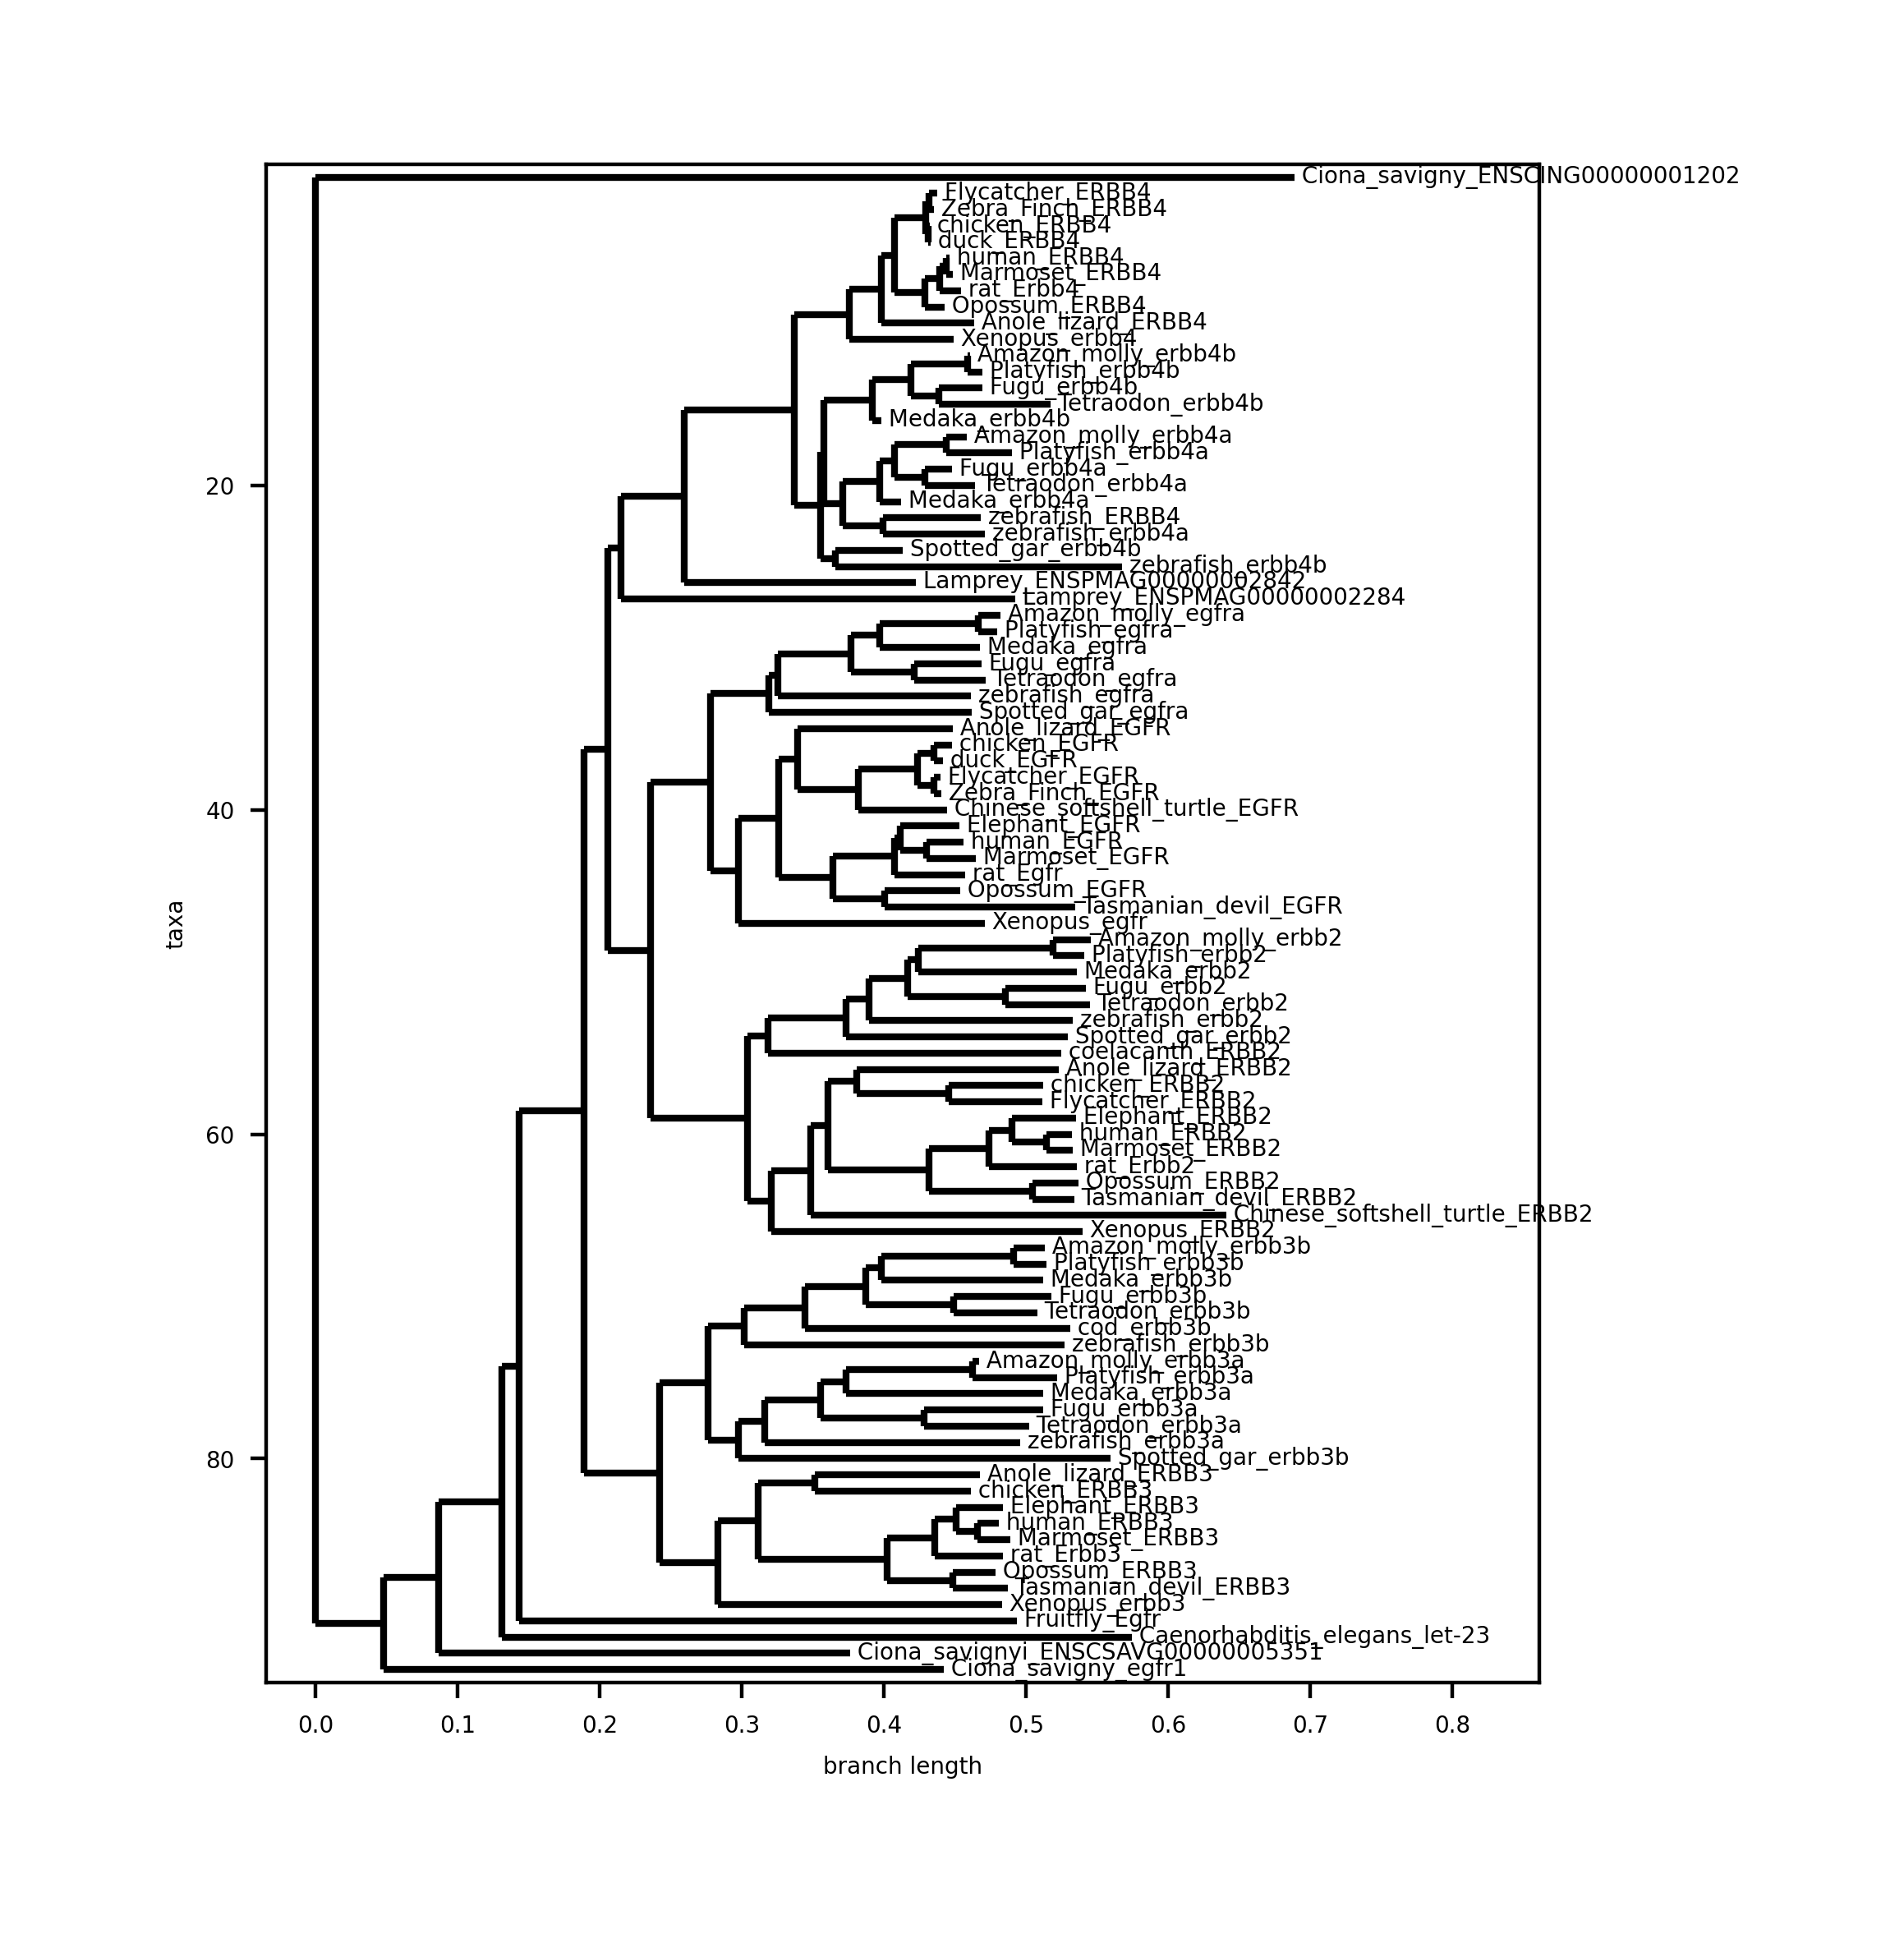

Wed Jun 19 10:35:53 2024	 Prune terminals: ['Ciona_savigny_ENSCING00000001202', 'Fruitfly_Egfr', 'Caenorhabditis_elegans_let-23', 'Ciona_savignyi_ENSCSAVG00000005351', 'Ciona_savigny_egfr1']
Wed Jun 19 10:35:54 2024	 recommend n_cluster: 4
Wed Jun 19 10:35:54 2024	 Subtrees:


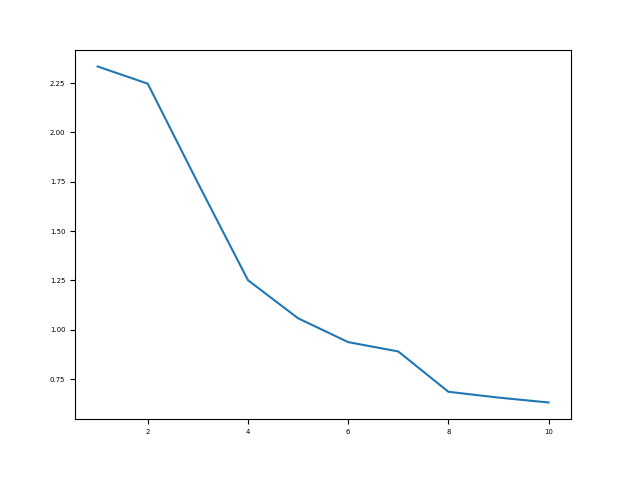

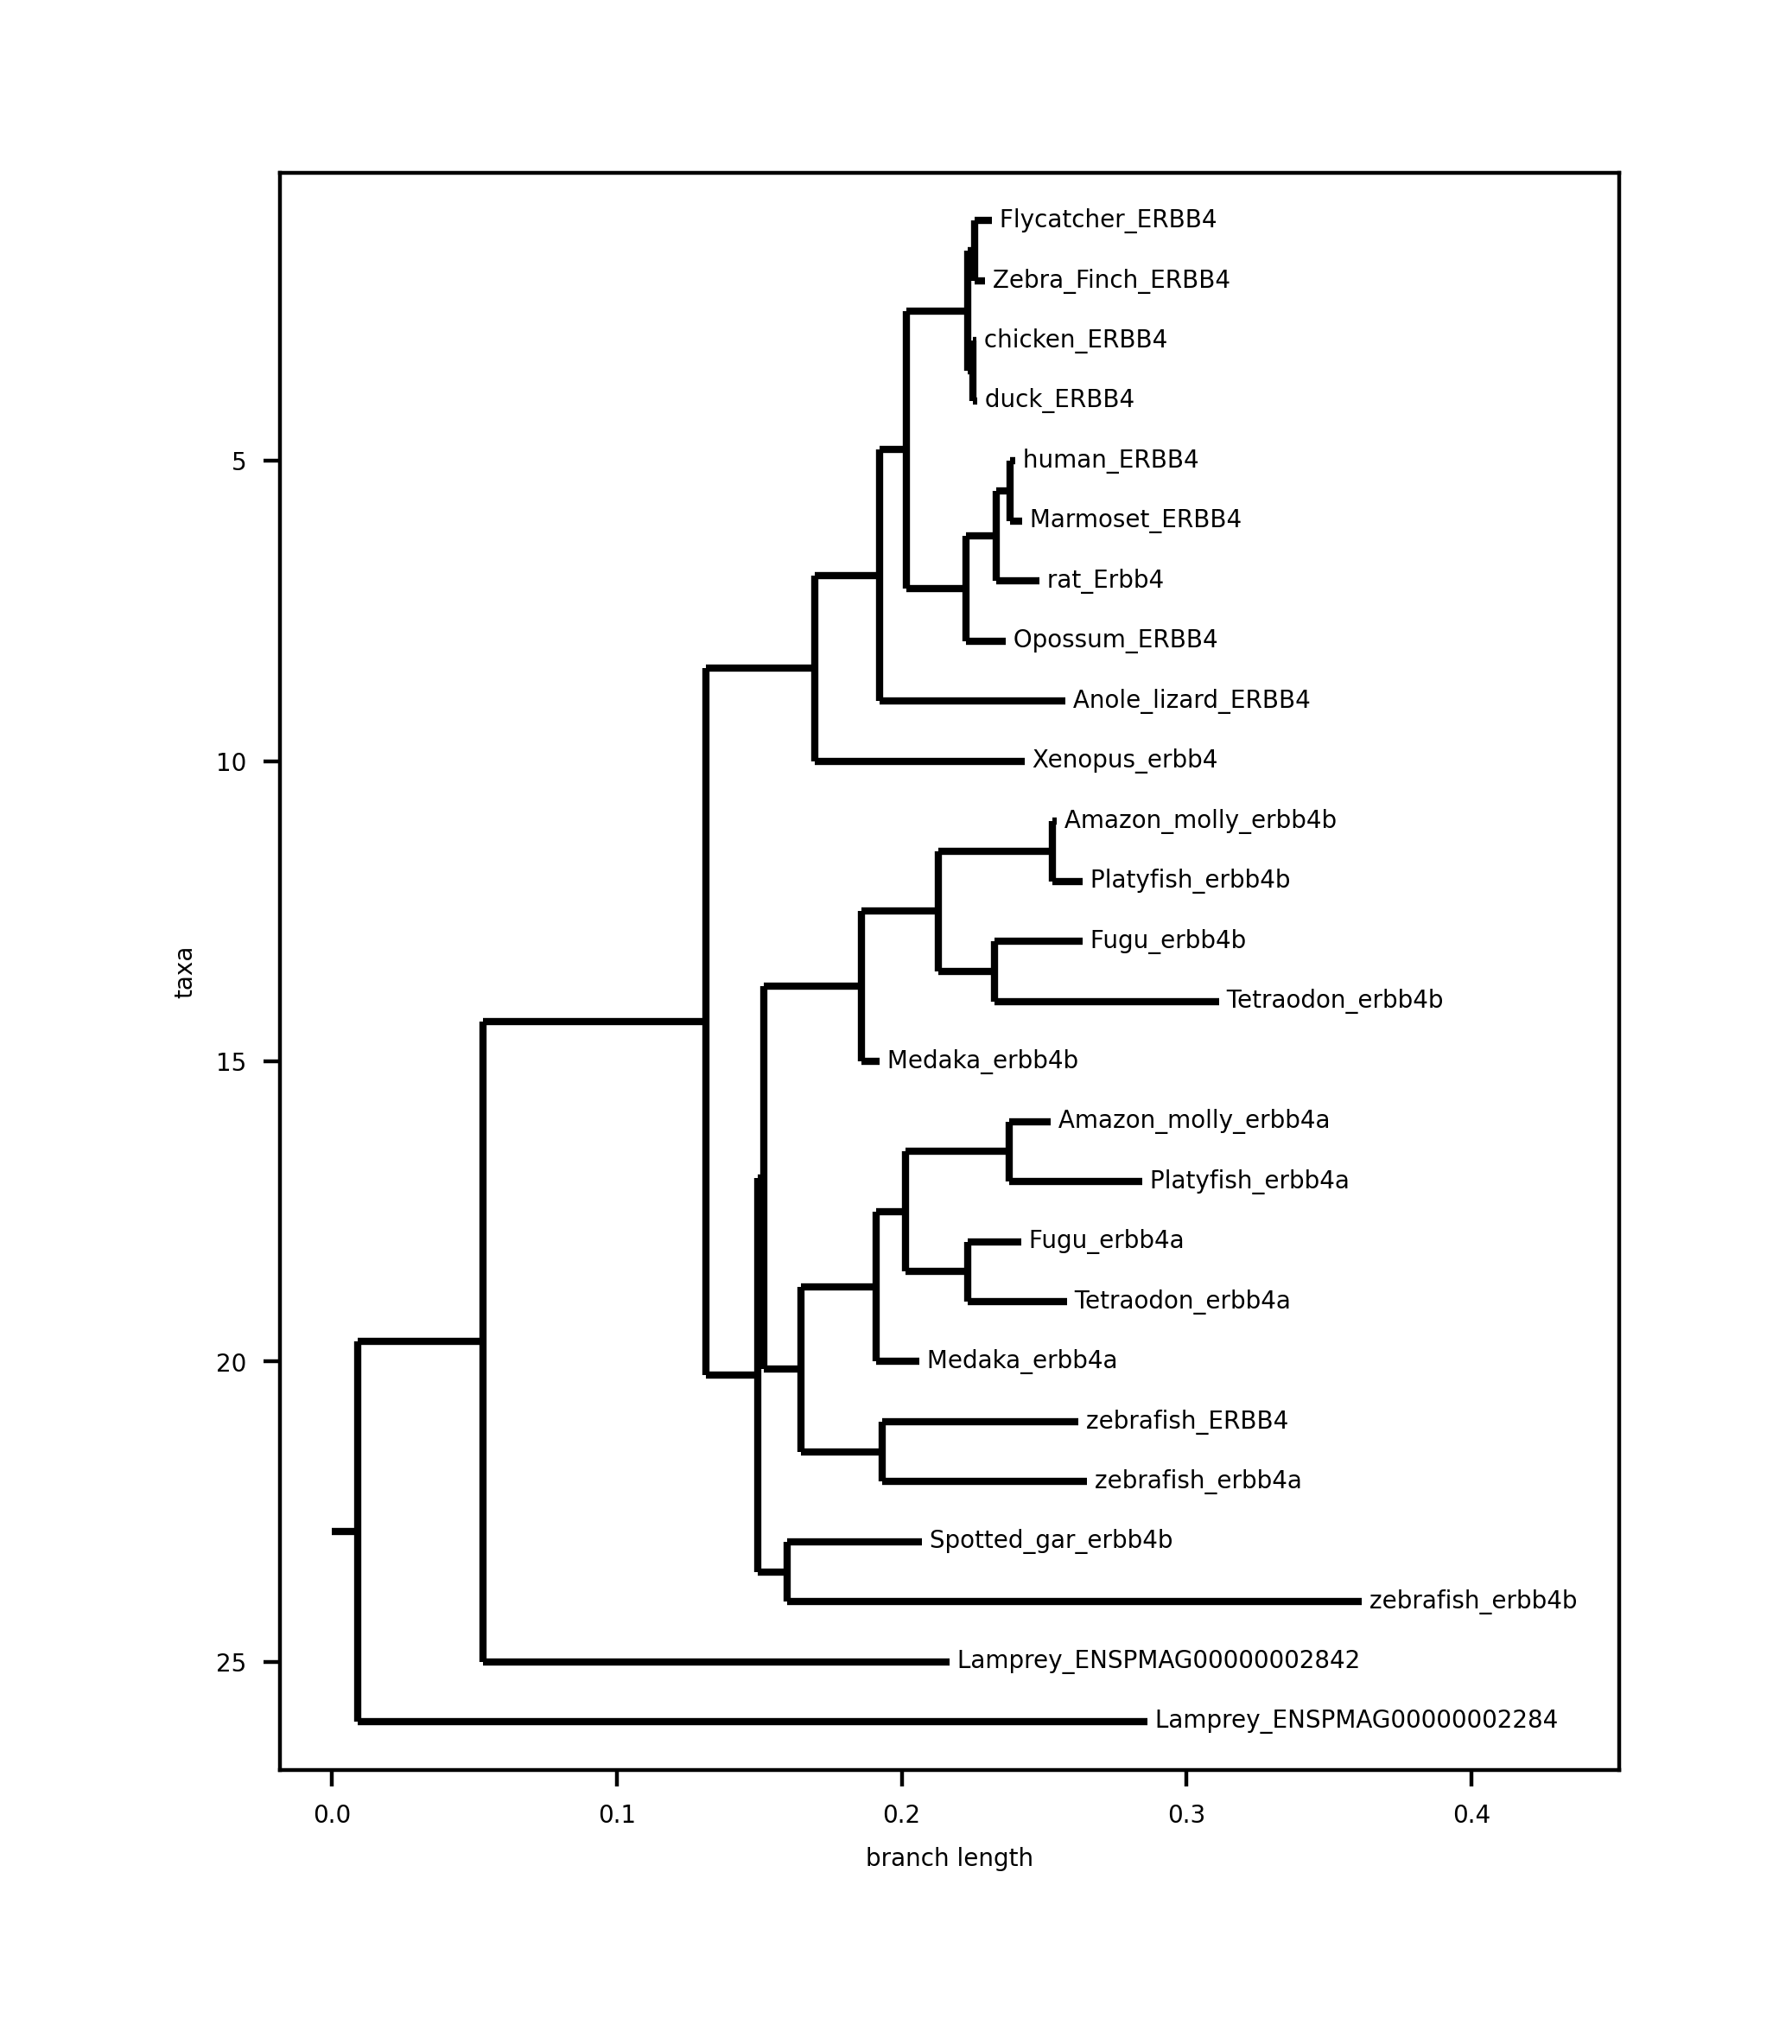

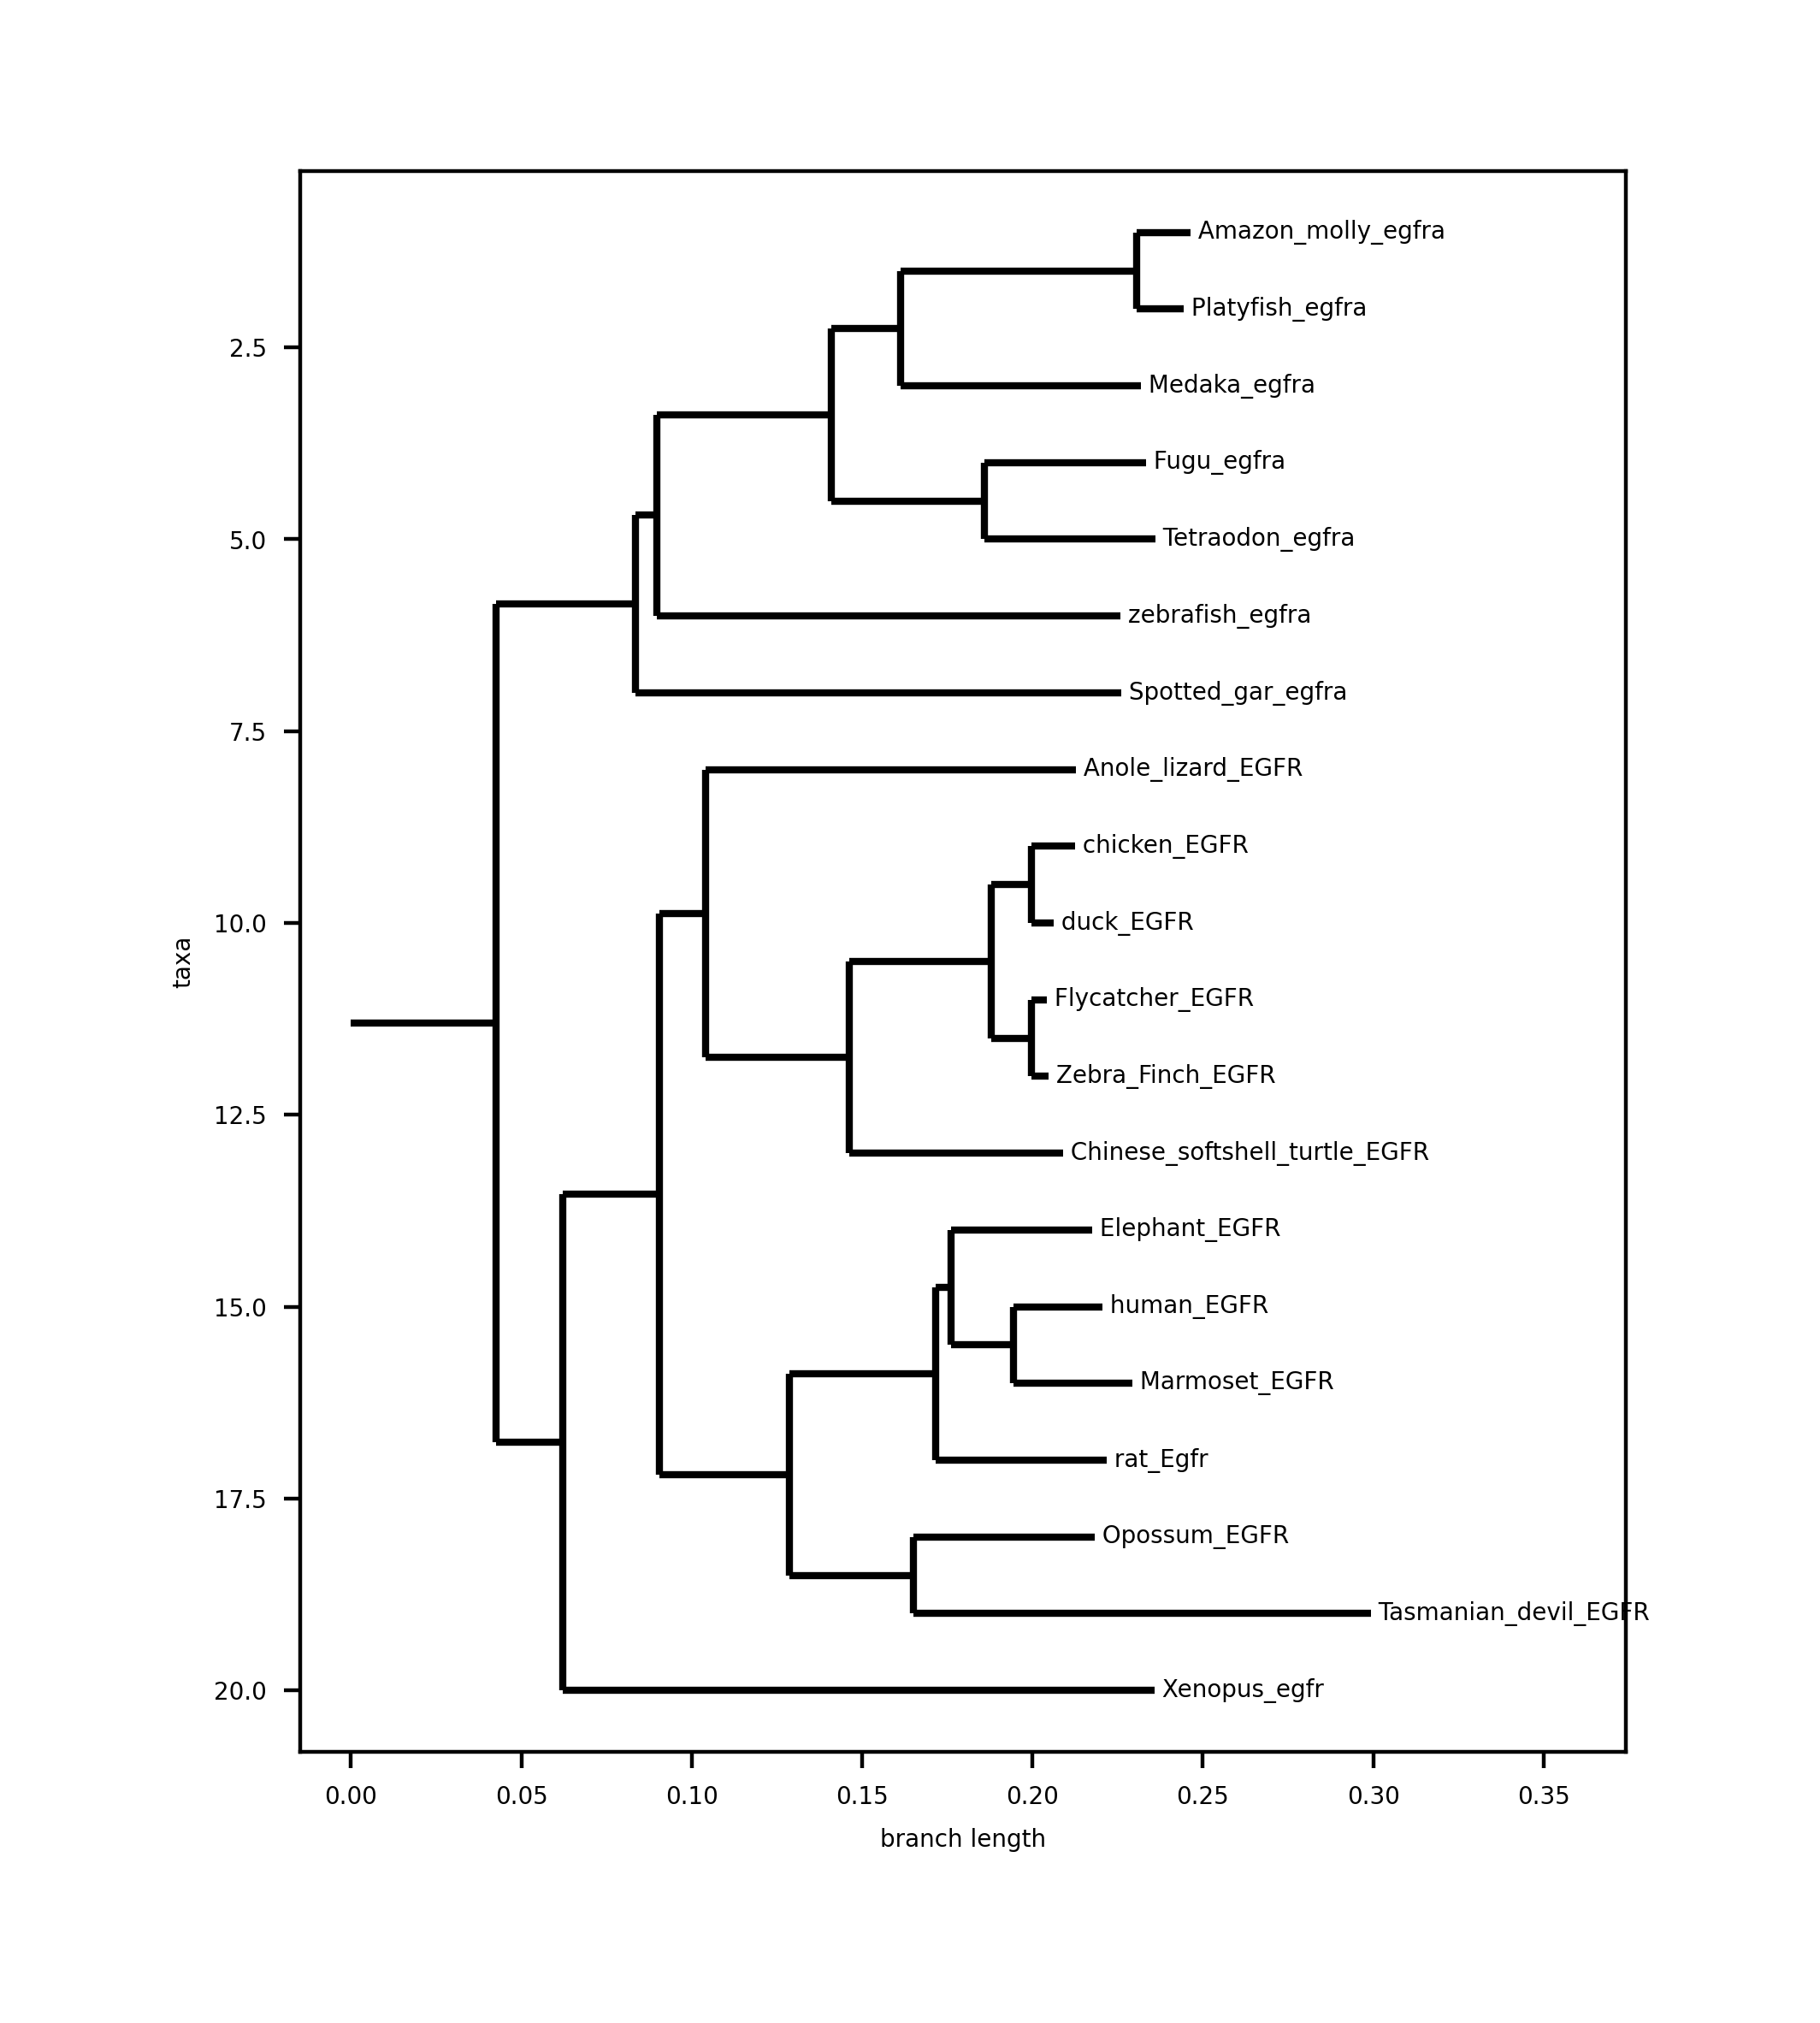

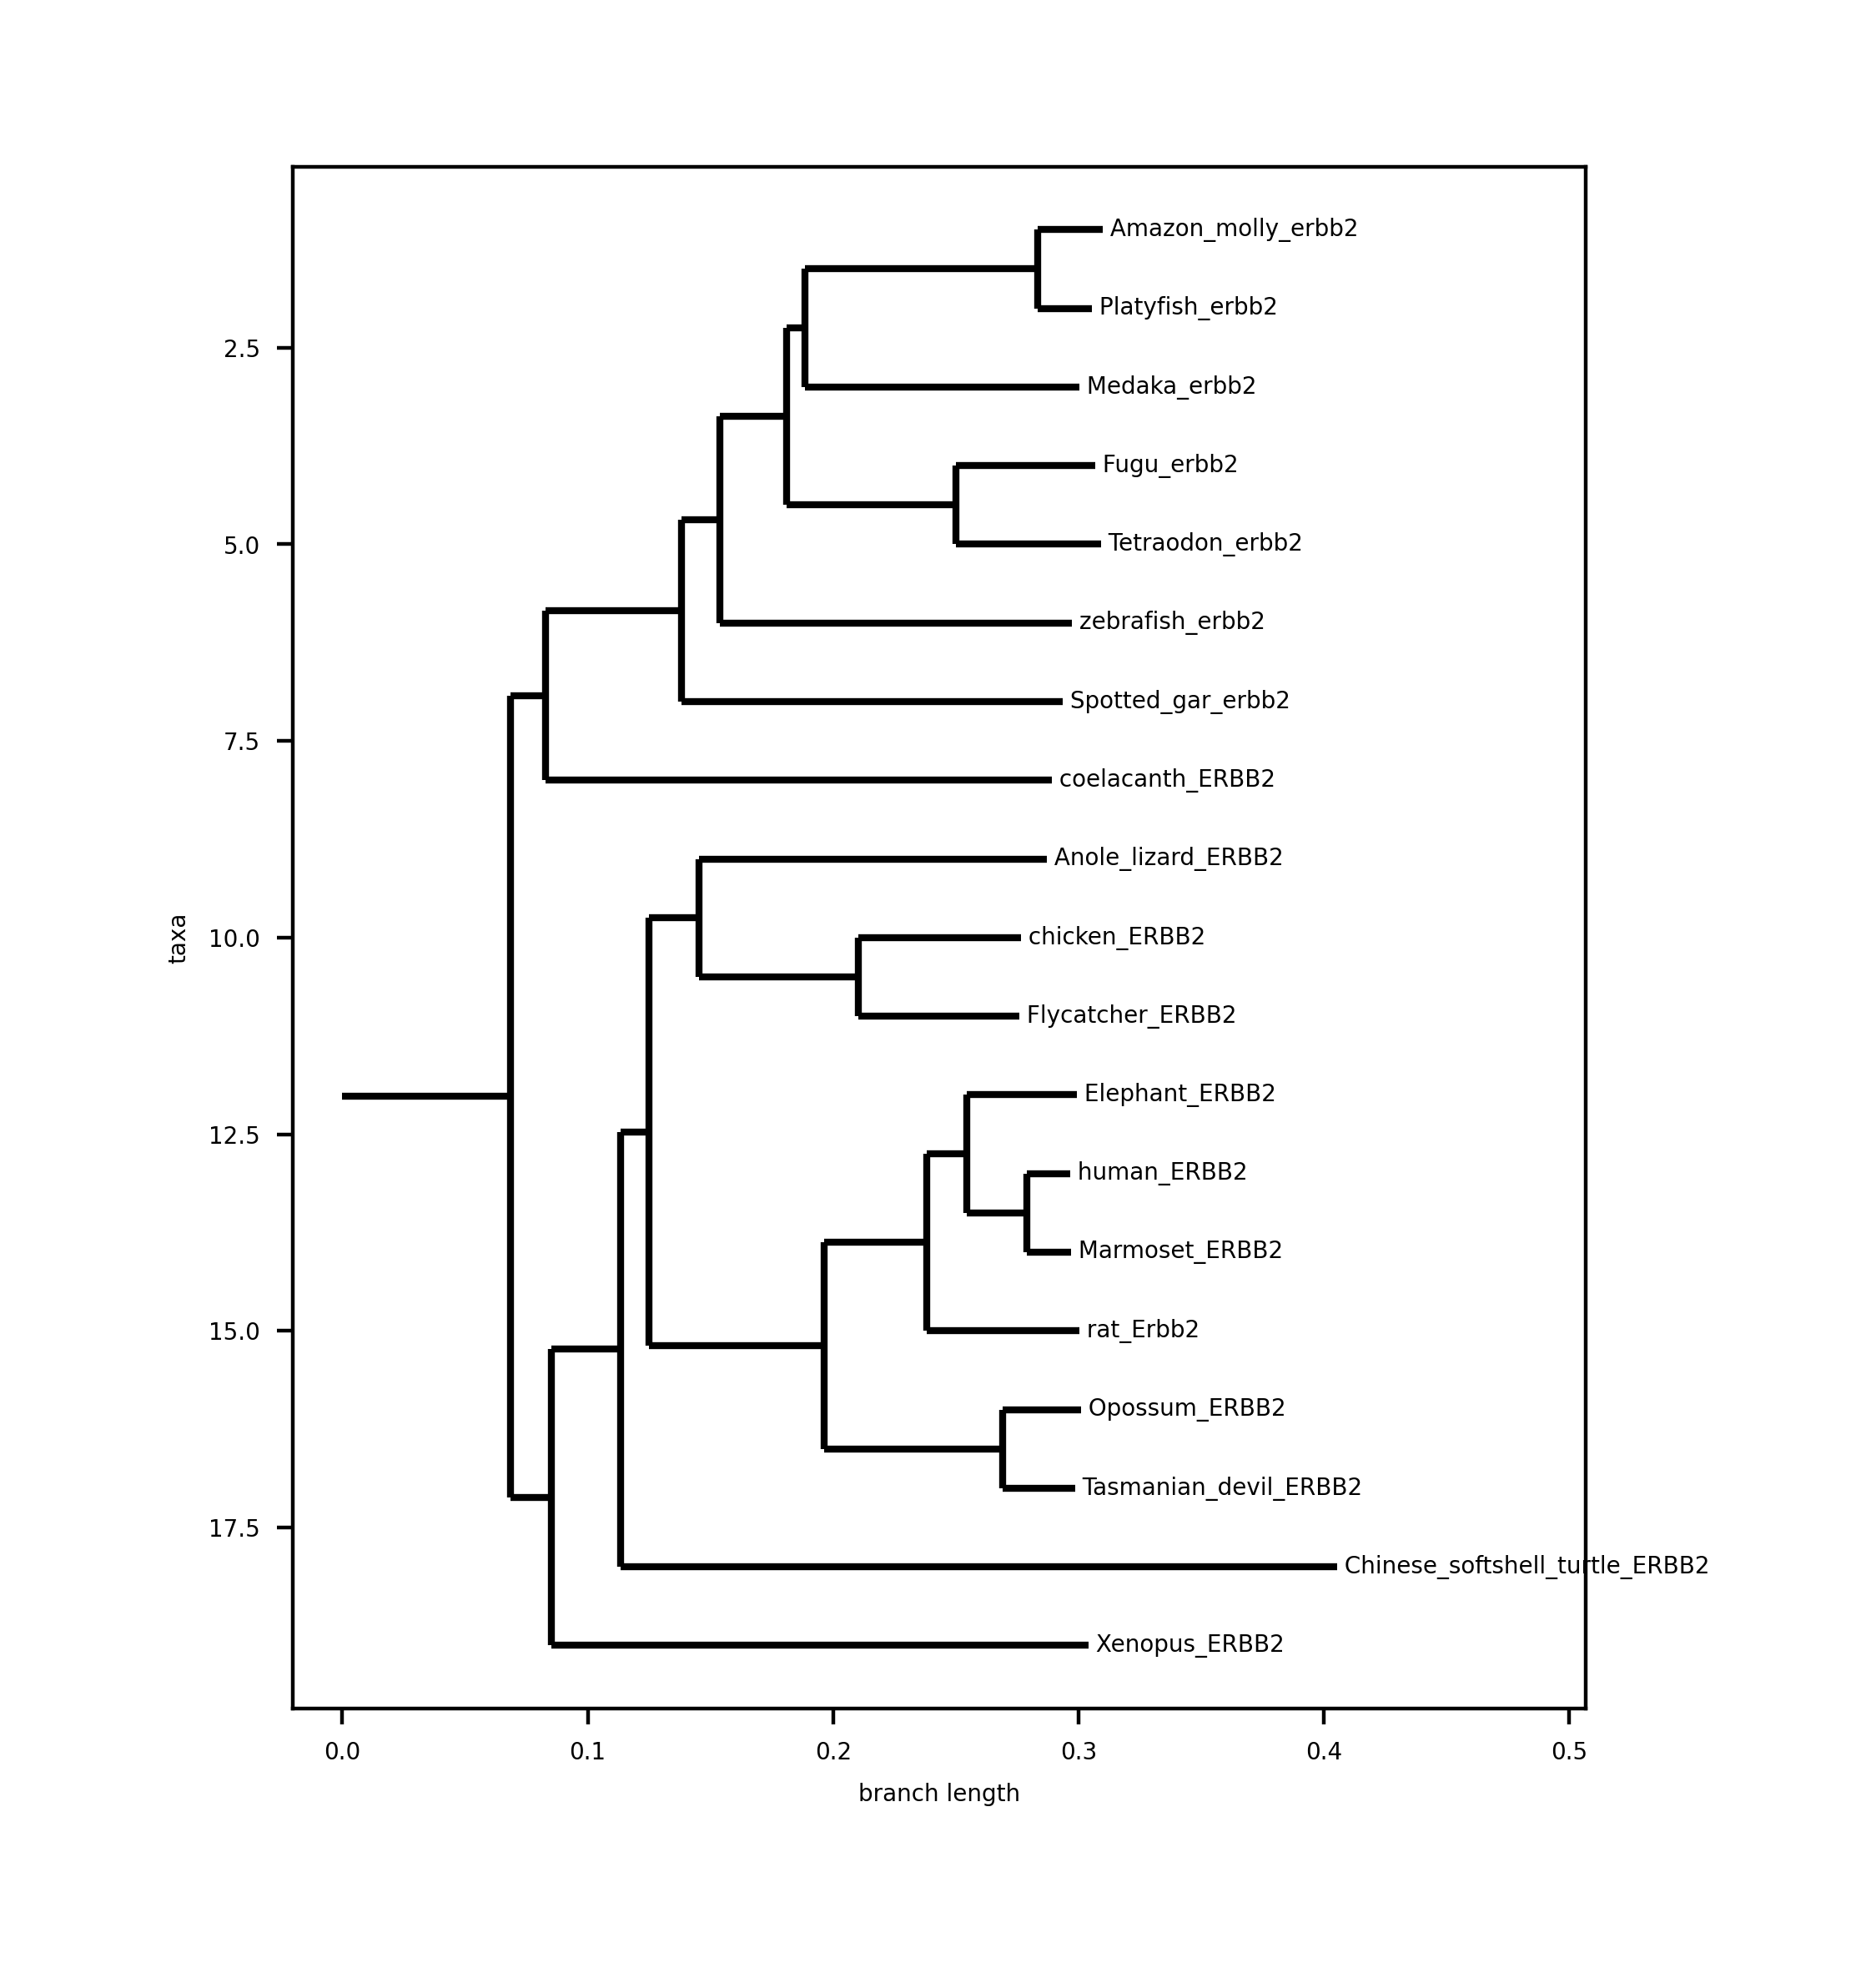

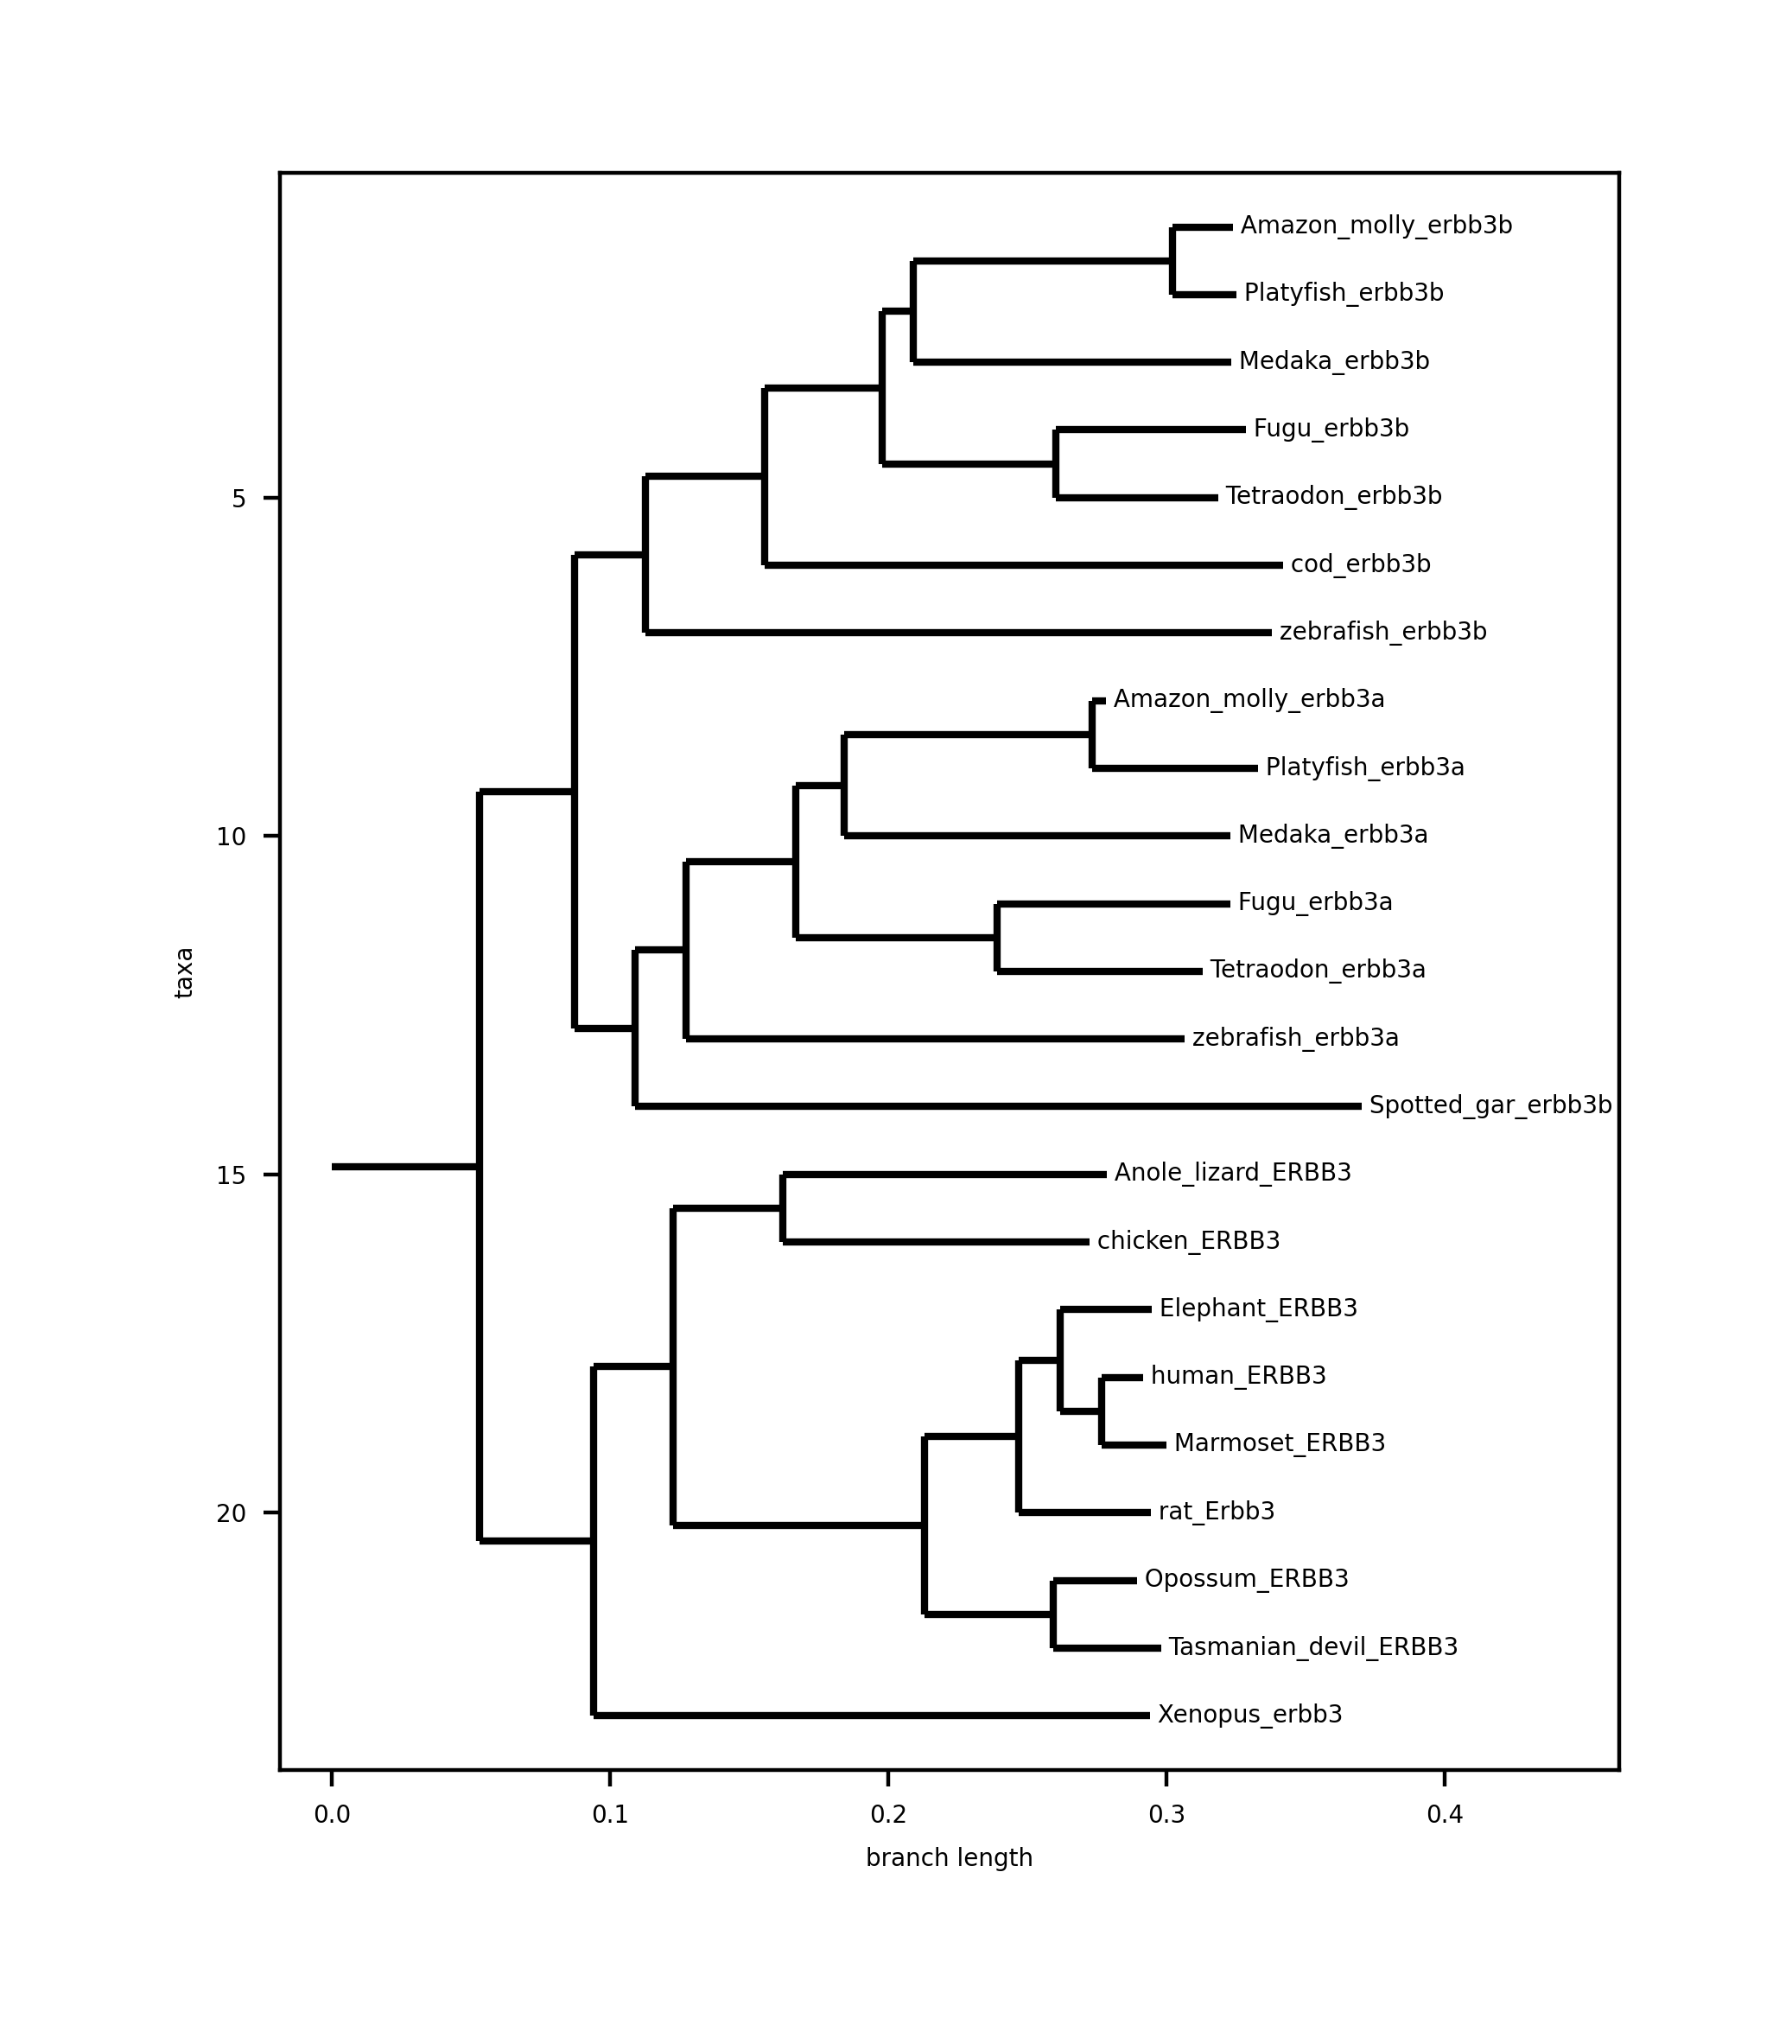

In [7]:
subtrees,subtree_clades,exclude_list= auto_split("./4.fas",plot=True,exclude_level=5,tree_construct_method='nj',dist_calc='blosum62',cluster_method='ward')

In [1]:
from Bio import AlignIO,Phylo
from diverge.utils import tree_construct,split_tree2

利用`SuperCluster`进行Ⅰ型功能分化以及Ⅱ型功能分化分析,也可以使用`save_subtrees`储存所有的子树。

In [9]:
save_subtrees(subtrees,"./ERBB_family_subtrees")

Subtree 0 saved as ./ERBB_family_subtrees/subtree_0.newick
Subtree 1 saved as ./ERBB_family_subtrees/subtree_1.newick
Subtree 2 saved as ./ERBB_family_subtrees/subtree_2.newick
Subtree 3 saved as ./ERBB_family_subtrees/subtree_3.newick


Thu Mar 14 20:03:34 2024	 Running subtree auto split process
Thu Mar 14 20:03:34 2024	 Calculating distance matrix from msa using blosum62 method...
Thu Mar 14 20:04:03 2024	 Constructing phylogenetic tree using nj method...
Thu Mar 14 20:04:03 2024	 remove terminals: ['Ciona_savigny_ENSCING00000001202', 'Caenorhabditis_elegans_let-23', 'Ciona_savignyi_ENSCSAVG00000005351', 'Ciona_savigny_egfr1']
Thu Mar 14 20:04:05 2024	 recommend n_cluster: 4
Thu Mar 14 20:04:14 2024	 Running type1 functional divergence super cluster analysis...


Processing super cluster groups: 100%|██████████| 7/7 [00:28<00:00,  4.09s/it]

Thu Mar 14 20:04:42 2024	 Finish super cluster analysis.


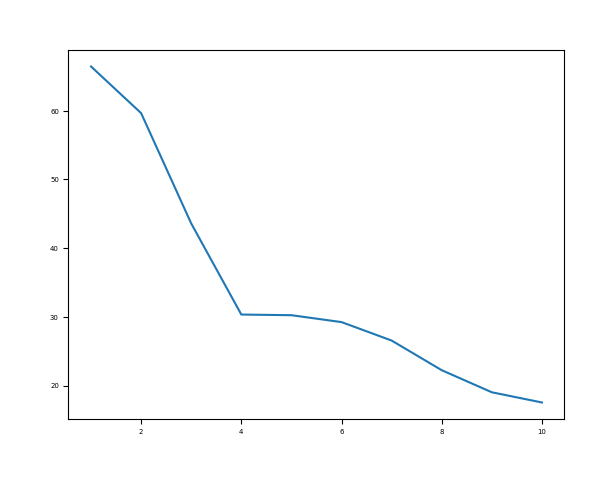

: 

In [3]:
from diverge import *
from diverge.utils import auto_split
from diverge import super_cluster
subtrees,subtree_clades,exclude_list= auto_split("./4.fas",plot=False,exclude_level=4,tree_construct_method='nj',dist_calc='blosum62',cluster_method='ward')
SuperCluster_1 = super_cluster.SuperCluster("./4.fas",trees=subtrees,sp_type=1)

In [2]:
from diverge import super_cluster
SuperCluster_2 = super_cluster.SuperCluster(2,"./4.fas","./ERBB_family_subtrees/subtree_0.newick","./ERBB_family_subtrees/subtree_1.newick","./ERBB_family_subtrees/subtree_2.newick","./ERBB_family_subtrees/subtree_3.newick")

完成Supercluster后,可以通过访问`SuperCluster.result`得到所有组合中各个alignment position上的功能分化后验概率（Qk）,Qk越接近1表明该位点越有可能发生了功能分化,是候选的功能重要氨基酸残基。你也可以通过`SuperCluster.summary`查看功能分化分析后的统计结果。It should be noticed that, to our experience, the statistical power of type-II method is relatively lower than that of type-I method, probably due to the fact that less number of amino acid sits are involved in type-II functional divergence between two gene clusters.

In [3]:
result_1 = SuperCluster_1.result
display(result_1)
result_2 = SuperCluster_2.result
display(result_2)

,322,325,326,327,331,332,333,337,360,361,...,1453,1454,1458,1459,1460,1473,1474,1475,1476,1477
"[[1], [2, 3, 4]]",0.565587,0.156759,0.123909,0.176068,0.042524,0.225764,0.225764,0.677919,0.096476,0.124051,...,0.073746,0.137237,0.091096,0.118704,0.403053,0.302365,0.126345,0.088170,0.742753,0.211104
"[[2], [1, 3, 4]]",0.474475,0.099653,0.183880,0.152892,0.070182,0.137796,0.137796,0.107325,0.273847,0.262443,...,0.048571,0.799983,0.776392,0.343347,0.582377,0.092512,0.090180,0.229071,0.090422,0.103757
"[[3], [1, 2, 4]]",0.144849,0.149736,0.145274,0.152176,0.060982,0.134624,0.134624,0.163704,0.108366,0.134319,...,0.145792,0.092769,0.993849,0.831280,0.150788,0.119134,0.184345,0.156736,0.549487,0.085472
"[[4], [1, 2, 3]]",0.112111,0.293824,0.285867,0.915094,0.266319,0.269866,0.269866,0.621800,0.229389,0.447900,...,0.144215,0.173651,0.942295,0.987718,0.992598,0.488795,0.248282,0.262742,0.997265,0.291433
"[[1, 2], [3, 4]]",0.130562,0.211451,0.286746,0.207019,0.137412,0.231518,0.231518,0.755352,0.270388,0.416937,...,0.123071,0.114351,0.116418,0.401773,0.964221,0.431240,0.176653,0.162183,0.757201,0.396966
"[[1, 3], [2, 4]]",0.102143,0.119287,0.080671,0.058321,0.040798,0.102059,0.102059,0.217065,0.073957,0.070598,...,0.034732,0.086558,0.087221,0.431898,0.191153,0.207155,0.139975,0.044722,0.991563,0.074672
"[[1, 4], [2, 3]]",0.636245,0.115770,0.146763,0.878907,0.065228,0.174109,0.174109,0.151700,0.129588,0.211133,...,0.080236,0.587000,0.999647,0.947106,0.366810,0.119014,0.109457,0.438165,0.468052,0.094371


,322,325,326,327,331,332,333,337,360,361,...,1453,1454,1458,1459,1460,1473,1474,1475,1476,1477
"[[1], [2, 3, 4]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[2], [1, 3, 4]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[3], [1, 2, 4]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[4], [1, 2, 3]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[1, 2], [3, 4]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[1, 3], [2, 4]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[[1, 4], [2, 3]]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
summary_1 = SuperCluster_1.summary
summary_2 = SuperCluster_2.summary
display(summary_1)
display(summary_2)

,"[[1], [2, 3, 4]]","[[2], [1, 3, 4]]","[[3], [1, 2, 4]]","[[4], [1, 2, 3]]","[[1, 2], [3, 4]]","[[1, 3], [2, 4]]","[[1, 4], [2, 3]]"
MFE Theta,0.209355,0.17954,0.223972,0.360318,0.242503,0.159067,0.208018
MFE se,0.031579,0.029492,0.030779,0.038799,0.030228,0.025997,0.0288
MFE r X,0.64138,0.668942,0.643242,0.521999,0.641614,0.706025,0.665974
MFE r max,0.811211,0.815325,0.82889,0.81603,0.847018,0.839573,0.840895
MFE z score,-8.503007,-7.672117,-9.671457,-12.999569,-11.13509,-7.824372,-9.668056
ThetaML,0.18,0.1512,0.2064,0.381118,0.3336,0.1192,0.205618
AlphaML,0.953125,0.950078,0.962323,0.885068,0.88253,0.974724,0.955025
SE Theta,0.025031,0.03122,0.027327,0.027643,0.028073,0.019287,0.026826
LRT Theta,51.712776,23.454896,57.046051,190.084403,141.21738,38.196431,58.748304
Qk>0.5,33,19,39,114,100,18,39


,"[[1], [2, 3, 4]]","[[2], [1, 3, 4]]","[[3], [1, 2, 4]]","[[4], [1, 2, 3]]","[[1, 2], [3, 4]]","[[1, 3], [2, 4]]","[[1, 4], [2, 3]]"
Da,2.257989,1.687506,3.212038,2.878891,4.16103,5.73841,5.489283
Db,8.114598,8.755185,7.251184,7.597665,6.385821,4.944348,5.123085
N,333.0,350.0,358.0,301.0,357.0,357.0,305.0
C,89.0,82.0,79.0,98.0,80.0,78.0,100.0
R,109.0,99.0,94.0,132.0,94.0,96.0,126.0
Alpha ML,0.953125,0.950078,0.962323,0.885068,0.88253,0.974724,0.955025
Theta-II,0.490993,0.492642,0.482157,0.538772,0.544783,0.460074,0.473683
Theta SE,0.09735,0.097035,0.09904,0.088212,0.087062,0.103263,0.100661
Ar,0.456296,0.427239,0.419567,0.489621,0.381567,0.441456,0.517615
PIr,0.31213,0.31213,0.31213,0.31213,0.31213,0.31213,0.31213


## Further Analysis

In [5]:
from Bio import SeqIO

human_sequences = [record for record in SeqIO.parse("./4.fas", "fasta") if record.id.startswith("human")]
mapping_dict = {}
result = result_1
summary = summary_2
for record in human_sequences:
    original_seq = str(record.seq).replace("-", "")  
    alignment_seq = str(record.seq)
    original_pos = 1  
    alignment_mapping = {}  
    for i, char in enumerate(alignment_seq):
        if char != "-":  
            alignment_mapping[i+1] = original_pos
            original_pos += 1
    mapping_dict[record.id] = alignment_mapping

In [16]:
def check_and_max(column,threshold):
    greater_than_threshold = column.gt(threshold)
    if greater_than_threshold.any():
        max_value = column[greater_than_threshold].max()
        return [True, max_value]
    else:
        return [False, None]

# 应用函数
def export_result(result,threshold):
    pp_threshold_with_max = result.apply(lambda x:check_and_max(x,threshold), axis=0)
    data = {'Exists': [], 'MaxValue': []}
    for col in result.columns:
        data['Exists'].append(pp_threshold_with_max[col][0])
        data['MaxValue'].append(pp_threshold_with_max[col][1])
    pp_threshold_with_max_df = pd.DataFrame(data, index=result.columns)
    pp_threshold_exists = pp_threshold_with_max_df[pp_threshold_with_max_df['Exists']]
    pp_threshold_list = pp_threshold_exists.index.tolist()
    result_mapping = {key: [mapping_dict[key].get(position, None) for position in pp_threshold_list] for key in mapping_dict}
    result_mapping['Alignment Position'] = pp_threshold_list
    result_mapping['Max Posterior probability'] = pp_threshold_exists['MaxValue'].tolist()
    result_df_mapping = pd.DataFrame(result_mapping)
    result_df_mapping = result_df_mapping.dropna(subset=result_df_mapping.columns[:4], how='all')
    result_df_mapping = result_df_mapping.set_index('Alignment Position',drop=True)
    return result_df_mapping

# result_df_mapping_50 = export_result(result,0.5)
# result_df_mapping_50.to_excel("./result_p50.xlsx")

# result_df_mapping_67 = export_result(result,0.67)
# result_df_mapping_67.to_excel("./result_p67.xlsx")

# result_df_mapping_90 = export_result(result,0.9)
# result_df_mapping_90.to_excel("./result_p90.xlsx")

In [17]:
result_df_mapping_90 = export_result(result,0)
result_df_mapping_90.to_excel("./result_all.xlsx")

In [17]:
summary = SuperCluster.summary
summary

,"[[1], [2, 3, 4]]","[[2], [1, 3, 4]]","[[3], [1, 2, 4]]","[[4], [1, 2, 3]]","[[1, 2], [3, 4]]","[[1, 3], [2, 4]]","[[1, 4], [2, 3]]"
θ±SE,0.21±0.03,0.18±0.03,0.22±0.03,0.36±0.04,0.24±0.03,0.16±0.03,0.21±0.03
z_score,-8.5,-7.67,-9.67,-13.0,-11.14,-7.82,-9.67
Qk>0.5,33,19,39,114,100,18,39
Qk>0.67,18,10,19,86,63,13,21
Qk>0.9,5,1,6,26,18,3,6


In [ ]:
import matplotlib.pyplot as plt
from Bio import Phylo
ERBB_family_tree = Phylo.read("./ERBB_family.nwk","newick")
f,ax = plt.subplots(dpi=300)
plt.rcParams.update({"font.size":4})
Phylo.draw(ERBB_family_tree,axes=ax,do_show=False)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('ERBB Family Tree', fontsize=10)